# Import Libraries & Packages

In [1]:
# Install necessary packages
!pip install yfinance matplotlib seaborn pandas numpy scikit-learn xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# ================================
# Import Required Libraries
# ================================

## Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Model Selection & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
    confusion_matrix, classification_report, roc_curve, auc
)

## Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier

## Statistical & Time Series Analysis
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

## Feature Importance & Interpretation
from sklearn.inspection import permutation_importance
# import shap  # Uncomment if SHAP is needed

## Finance & Stock Market Data
import yfinance as yf

## Adjust Display Settings for Pandas
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Adjust display width for better readability

# DL
#import torch
#import torch.nn as nn
#from torch.utils.data import DataLoader, Dataset


# 1.0 Data Loading & Understanding

# 1.1 Nvidia (NVDA) Stock

In [5]:
# Download NVDA stock data with multi-level columns
nvda = yf.download('NVDA', start='2010-01-01', end='2024-12-31', auto_adjust=False)

# Restructure the DataFrame to have a single level of columns
nvda = nvda.stack(level=1).reset_index()  # Stack the 'Ticker' level and reset index

# Rename the stacked level column to 'Ticker' for clarity
nvda.rename(columns={'level_1': 'Ticker'}, inplace=True)

# Display first few rows
print("NVDA Data Head:")
nvda.head()

[*********************100%***********************]  1 of 1 completed

NVDA Data Head:



C:\Users\Kenny Ogundana\AppData\Local\Temp\ipykernel_14480\3264787924.py:5: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  nvda = nvda.stack(level=1).reset_index()  # Stack the 'Ticker' level and reset index


Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,NVDA,0.423923,0.46225,0.4655,0.45275,0.46275,800204000
1,2010-01-05,NVDA,0.430113,0.46900,0.4740,0.46050,0.46050,728648000
2,2010-01-06,NVDA,0.432864,0.47200,0.4730,0.46425,0.46875,649168000
3,2010-01-07,NVDA,0.424381,0.46275,0.4715,0.45925,0.46950,547792000
4,2010-01-08,NVDA,0.425298,0.46375,0.4670,0.45625,0.45900,478168000


In [6]:
# Display data info
print("\nNVDA Data Info:")
print(nvda.info())



NVDA Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3773 non-null   datetime64[ns]
 1   Ticker     3773 non-null   object        
 2   Adj Close  3773 non-null   float64       
 3   Close      3773 non-null   float64       
 4   High       3773 non-null   float64       
 5   Low        3773 non-null   float64       
 6   Open       3773 non-null   float64       
 7   Volume     3773 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 235.9+ KB
None


In [7]:
# Display summary statistics
print("\nNVDA Data Description:")
nvda.describe()


NVDA Data Description:


Price,Date,Adj Close,Close,High,Low,Open,Volume
count,3773,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3.773000e+03
mean,2017-07-01 04:17:14.296315648,13.946999,13.975979,14.229375,13.699341,13.976677,4.970860e+08
min,2010-01-04 00:00:00,0.203593,0.222000,0.226250,0.216250,0.218000,4.564400e+07
25%,2013-10-02 00:00:00,0.410854,0.443000,0.449500,0.435750,0.443500,3.034880e+08
50%,2017-06-30 00:00:00,3.542646,3.576250,3.632000,3.473500,3.546750,4.283480e+08
75%,2021-03-31 00:00:00,13.556595,13.591000,13.838000,13.361000,13.627250,6.025800e+08
max,2024-12-30 00:00:00,148.869751,148.880005,152.889999,146.259995,149.350006,3.692928e+09
std,NaN,28.026172,28.022693,28.542450,27.465434,28.047553,3.064658e+08


In [8]:
# Check for missing values
print("\nChecking Missing Values:")
print(nvda.isna().sum())


Checking Missing Values:
Price
Date         0
Ticker       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


# Comment:  NVDA (NVIDIA Corporation) Statistics:

1. Total Data Points: 3,773 trading days.

2. Average Prices:
  * Adjusted Close: $13.95
  * Close: $13.98
  * High: $14.23
  * Low: $13.70
  * Open: $13.98

3. Price Range:
  * Minimum Close: $0.22
  * Maximum Close: $148.88

4. Standard Deviation:
  * Adjusted Close: $28.03
  * High: $28.54 (highest variability among prices).

5. Trading Volume:
  * Average Volume: 497.1 million.
  * Minimum Volume: 45.6 million.
  * Maximum Volume: 3.69 billion (high trading activity).

6. Median Prices (50th Percentile):
  * Adjusted Close: $3.54
  * Open: $3.54

7. Quartile Analysis:

  * 25th Percentile: Adjusted Close at $0.41.
  * 75th Percentile: Adjusted Close at $13.56.

A significant price increase is observed between the 50th and 75th percentiles, indicating growth over time.

# 1.2 Quantum Computing(QUBT) Stock

In [9]:
# Download QUBT stock data
qubt = yf.download('QUBT', start='2010-01-01', end='2024-12-31', auto_adjust=False)

# Restructure the DataFrame to have a single level of columns
qubt = qubt.stack(level=1).reset_index()  # Stack the 'Ticker' level and reset index

# Rename the stacked level column to 'Ticker' for clarity
qubt.rename(columns={'level_1': 'Ticker'}, inplace=True)

# Display first few rows
print("QUBT Data Head:")
qubt.head()

[*********************100%***********************]  1 of 1 completed

QUBT Data Head:



C:\Users\Kenny Ogundana\AppData\Local\Temp\ipykernel_14480\3085384233.py:5: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  qubt = qubt.stack(level=1).reset_index()  # Stack the 'Ticker' level and reset index


Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,QUBT,190.0,190.0,190.0,180.0,190.0,29
1,2010-01-05,QUBT,220.0,220.0,220.0,190.0,190.0,212
2,2010-01-06,QUBT,194.0,194.0,220.0,190.0,220.0,99
3,2010-01-07,QUBT,200.0,200.0,200.0,190.0,194.0,137
4,2010-01-08,QUBT,190.0,190.0,200.0,190.0,200.0,70


In [10]:
# Display data info
print("\nQUBT Data Info:")
qubt.info()


QUBT Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3773 non-null   datetime64[ns]
 1   Ticker     3773 non-null   object        
 2   Adj Close  3773 non-null   float64       
 3   Close      3773 non-null   float64       
 4   High       3773 non-null   float64       
 5   Low        3773 non-null   float64       
 6   Open       3773 non-null   float64       
 7   Volume     3773 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 235.9+ KB


In [11]:
# Display summary statistics
print("\nQUBT Data Description:")
qubt.describe()



QUBT Data Description:


Price,Date,Adj Close,Close,High,Low,Open,Volume
count,3773,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3.773000e+03
mean,2017-07-01 04:17:14.296315648,6.707311,6.707311,7.182021,6.160813,6.726066,7.932593e+05
min,2010-01-04 00:00:00,0.015000,0.015000,0.015000,0.015000,0.015000,0.000000e+00
25%,2013-10-02 00:00:00,0.650000,0.650000,0.681000,0.617000,0.650000,0.000000e+00
50%,2017-06-30 00:00:00,2.400000,2.400000,2.580000,2.200000,2.400000,1.000000e+02
75%,2021-03-31 00:00:00,5.180000,5.180000,5.500000,5.000000,5.100000,7.820000e+04
max,2024-12-30 00:00:00,238.000000,238.000000,240.000000,220.000000,240.000000,2.326194e+08
std,NaN,22.893922,22.893922,24.299157,21.062342,23.061480,8.652535e+06


In [12]:
# Check for missing values
print("\nChecking Missing Values:")
print(qubt.isna().sum())


Checking Missing Values:
Price
Date         0
Ticker       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


# Comment: QUBT (Quantum Computing Inc.) Statistics:

1. Total Data Points: 3,773 trading days.

2. Average Prices:
  * Adjusted Close and Close: $6.71
  * High: $7.18
  * Low: $6.16
  * Open: $6.73

3. Price Range:
  * Minimum Close: $0.015
  * Maximum Close: $238.00
  
4. Standard Deviation:
  * Adjusted Close and Close: $22.89 (indicating high variability).
  * High: $24.30 (reflecting large price swings).

5. Trading Volume:
  * Average Volume: 793,259 shares.
  * Minimum Volume: Zero (indicating some inactive trading days).
  * Maximum Volume: 232.6 million.

6. Quartile Analysis:

  * 25th Percentile: Adjusted Close at $0.65.
  * 75th Percentile: Adjusted Close at $5.18.
  
The data reflects significant price volatility, especially as the maximum price and volume values are much higher than the averages.

# 2.0 Feature Engineering
The under listed are the features to engineer: 
1. Returns: Measures the daily percentage change in stock prices.
2. Tomorrow(Prediction): Captures the next day's adjusted close price for predictive modeling.
3. Stock_Direction(Target Variable): The direction column provides binary observations of daily price movements, indicating whether the stock price moved up or down (Target feature).

# For NVDA:

In [13]:
# Stock Returns: Percentage change for Adj Close
nvda['Returns'] = nvda['Adj Close'].pct_change().fillna(0)

# Prediction (Tomorrow) Feature: Next day's Adjusted Close
nvda['Tomorrow'] = nvda['Adj Close'].shift(-1)

# Stock-Direction Feature: Target variable (1 if Tomorrow's price > Today's price, else 0)
nvda['Stock_Direction'] = (nvda['Tomorrow'] > nvda['Adj Close']).astype(int)

# Display the head of the NVDA data
nvda.head()


Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Returns,Tomorrow,Stock_Direction
0,2010-01-04,NVDA,0.423923,0.46225,0.4655,0.45275,0.46275,800204000,0.000000,0.430113,1
1,2010-01-05,NVDA,0.430113,0.46900,0.4740,0.46050,0.46050,728648000,0.014602,0.432864,1
2,2010-01-06,NVDA,0.432864,0.47200,0.4730,0.46425,0.46875,649168000,0.006397,0.424381,0
3,2010-01-07,NVDA,0.424381,0.46275,0.4715,0.45925,0.46950,547792000,-0.019598,0.425298,1
4,2010-01-08,NVDA,0.425298,0.46375,0.4670,0.45625,0.45900,478168000,0.002161,0.419337,0


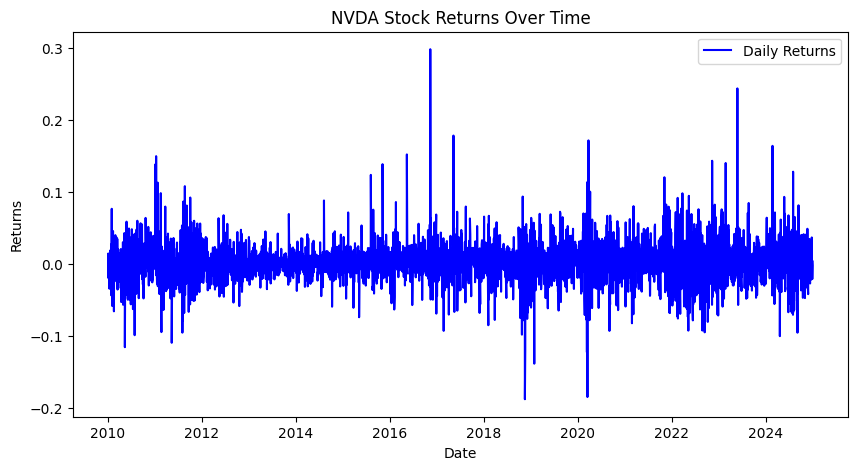

C:\Users\Kenny Ogundana\AppData\Local\Temp\ipykernel_14480\3766744227.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=nvda, x='Stock_Direction', palette='Set2')


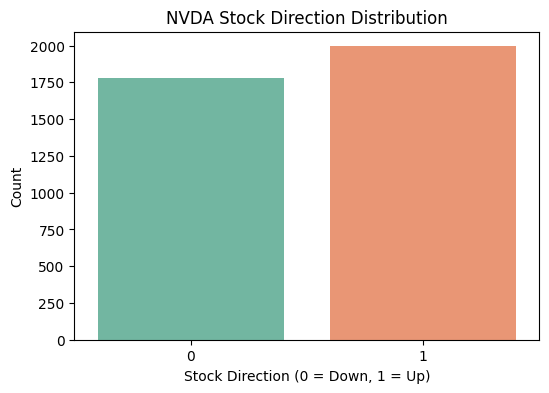

Stock_Direction
1    1994
0    1779
Name: count, dtype: int64

In [14]:
# Plot Stock Returns
plt.figure(figsize=(10, 5))
plt.plot(nvda['Date'], nvda['Returns'], label='Daily Returns', color='blue')
plt.title('NVDA Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Bar plot for Stock Direction Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=nvda, x='Stock_Direction', palette='Set2')
plt.title('NVDA Stock Direction Distribution')
plt.xlabel('Stock Direction (0 = Down, 1 = Up)')
plt.ylabel('Count')
plt.show()

nvda['Stock_Direction'].value_counts()


# For QUBT:

In [15]:
# Stock Returns: Percentage change for Adj Close
qubt['Returns'] = qubt['Adj Close'].pct_change().fillna(0)

# Prediction (Tomorrow) Feature: Next day's Adjusted Close
qubt['Tomorrow'] = qubt['Adj Close'].shift(-1)

# Stock-Direction Feature: Target variable (1 if Tomorrow's price > Today's price, else 0)
qubt['Stock_Direction'] = (qubt['Tomorrow'] > qubt['Adj Close']).astype(int)

# Display the head of the QUBT data
qubt.head()

Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Returns,Tomorrow,Stock_Direction
0,2010-01-04,QUBT,190.0,190.0,190.0,180.0,190.0,29,0.000000,220.0,1
1,2010-01-05,QUBT,220.0,220.0,220.0,190.0,190.0,212,0.157895,194.0,0
2,2010-01-06,QUBT,194.0,194.0,220.0,190.0,220.0,99,-0.118182,200.0,1
3,2010-01-07,QUBT,200.0,200.0,200.0,190.0,194.0,137,0.030928,190.0,0
4,2010-01-08,QUBT,190.0,190.0,200.0,190.0,200.0,70,-0.050000,194.0,1


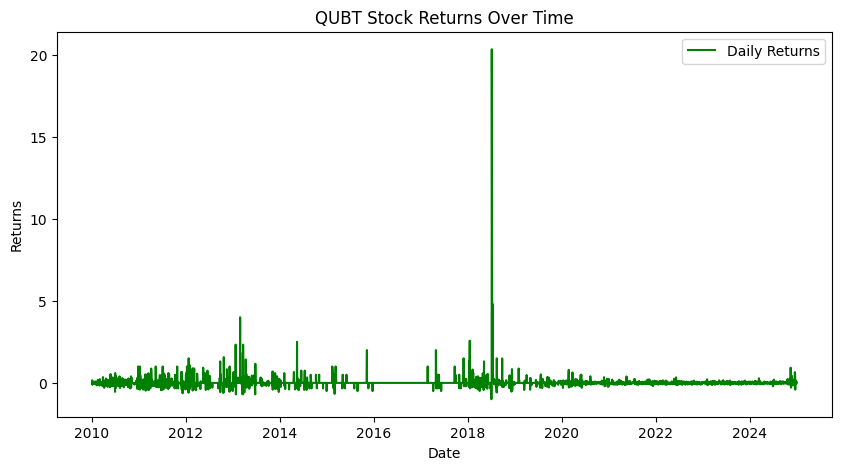

C:\Users\Kenny Ogundana\AppData\Local\Temp\ipykernel_14480\1740356952.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=qubt, x='Stock_Direction', palette='Set3')


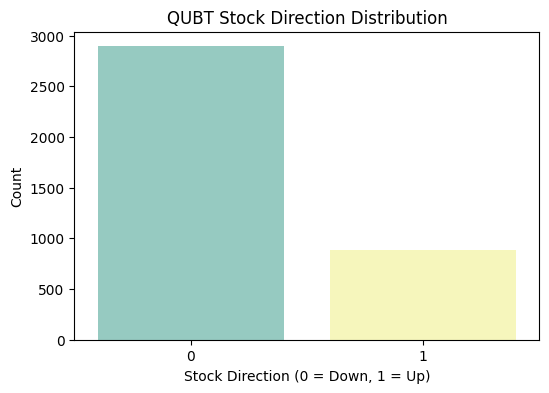

Stock_Direction
0    2893
1     880
Name: count, dtype: int64

In [16]:
# Plot Stock Returns
plt.figure(figsize=(10, 5))
plt.plot(qubt['Date'], qubt['Returns'], label='Daily Returns', color='green')
plt.title('QUBT Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Bar plot for Stock Direction Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=qubt, x='Stock_Direction', palette='Set3')
plt.title('QUBT Stock Direction Distribution')
plt.xlabel('Stock Direction (0 = Down, 1 = Up)')
plt.ylabel('Count')
plt.show()

qubt['Stock_Direction'].value_counts()


#  Key Insights: NVDA vs. QUBT
# NVDA:

1. Returns: Average daily return is relatively low at 0.19%, with a standard deviation of 2.86%, indicating moderate volatility.

2. Stock Direction: NVDA's price is bullish for 52.8% of days and bearish for 47.2%.

3. Cumulative Returns: Mean cumulative return is 32.91, showing significant long-term growth.

4. Volatility: Average volatility of 2.62% reflects consistent performance.


# QUBT:

1. Returns: Average daily return is higher at 2.03%, but variability is much greater with a standard deviation of 39.56%, reflecting high risk.

2. Stock Direction: QUBT is bullish for only 23.3% of days, significantly underperforming NVDA.

3. Cumulative Returns: Mean cumulative return is a low 0.035, indicating minimal long-term growth.

4. Volatility: Average volatility of 16.93% highlights QUBT's speculative nature compared to NVDA.

# Implications:

  * NVDA is a stable, growth-oriented stock, appealing to long-term investors.
  
  * QUBT exhibits speculative behavior, suitable for high-risk, high-reward traders.

# 3.0 Exploratory Data and Stock Market Analysis:

# 3.1 Investigate Historical Trends, Daily Returns & Volatility
# NVDA: 

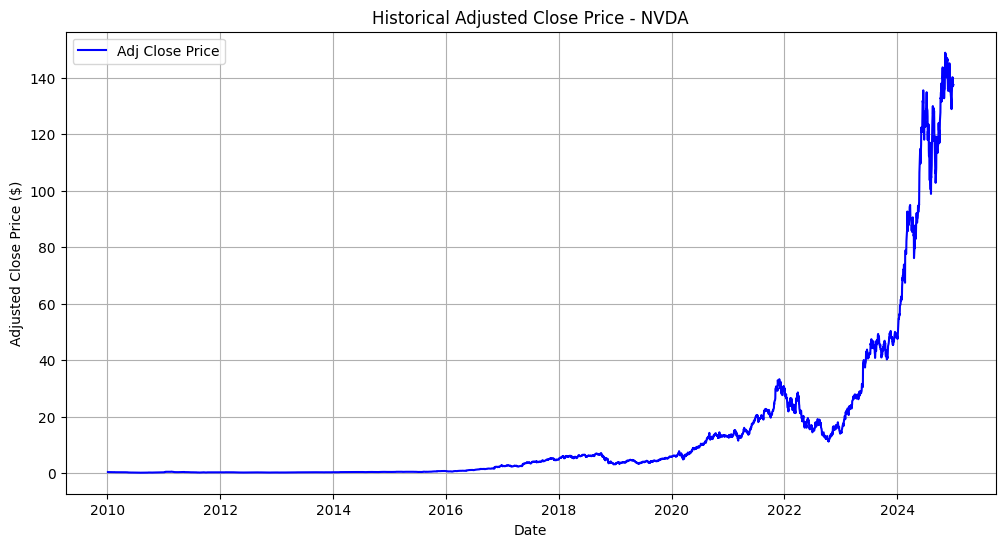

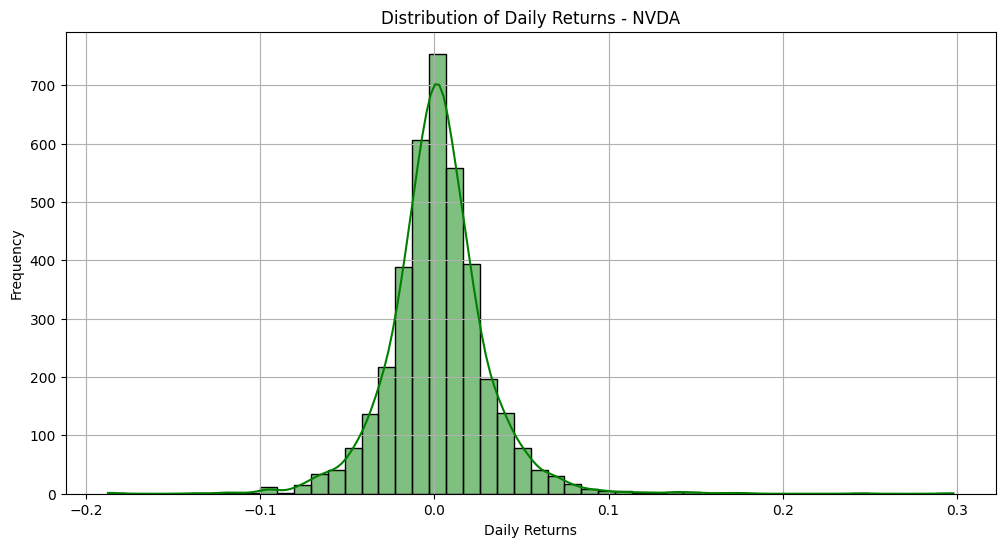

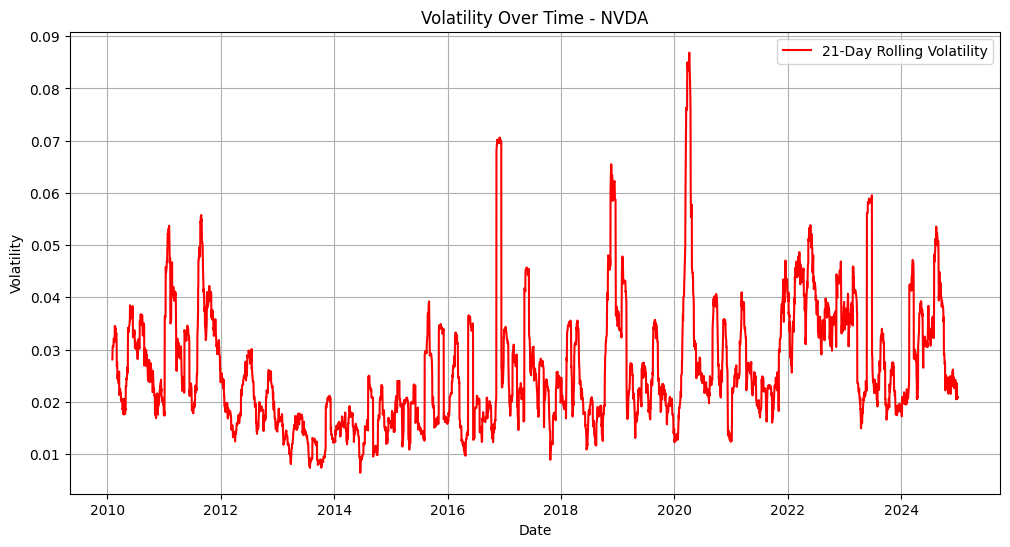

In [17]:
# Historical trends for NVDA
plt.figure(figsize=(12, 6))
plt.plot(nvda['Date'], nvda['Adj Close'], label='Adj Close Price', color='blue')
plt.title('Historical Adjusted Close Price - NVDA')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')
plt.legend()
plt.grid()
plt.show()

# Daily returns and their distribution
plt.figure(figsize=(12, 6))
sns.histplot(nvda['Returns'], kde=True, bins=50, color='green')
plt.title('Distribution of Daily Returns - NVDA')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Volatility calculation: rolling standard deviation
nvda['Volatility'] = nvda['Returns'].rolling(window=21).std()
plt.figure(figsize=(12, 6))
plt.plot(nvda['Date'], nvda['Volatility'], label='21-Day Rolling Volatility', color='red')
plt.title('Volatility Over Time - NVDA')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid()
plt.show()


# QUBT:

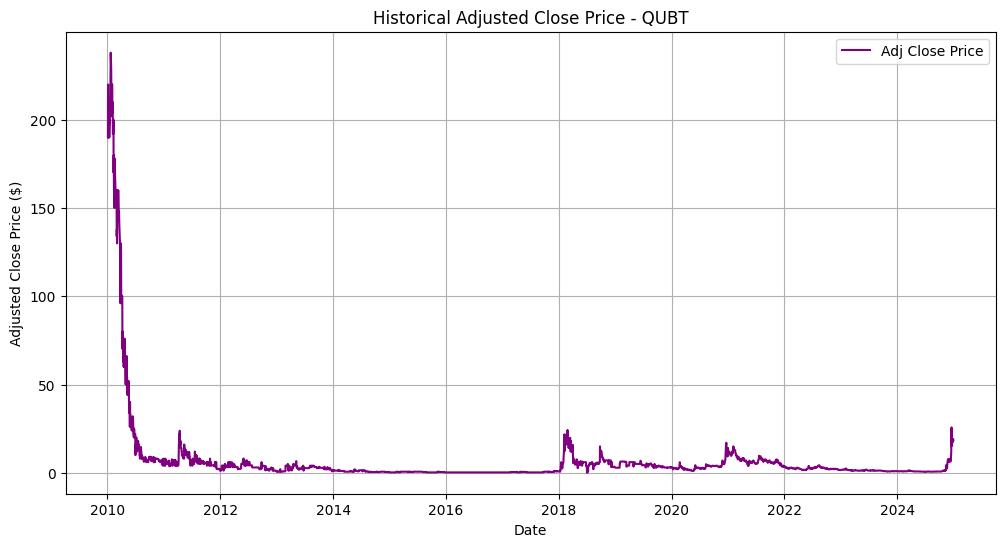

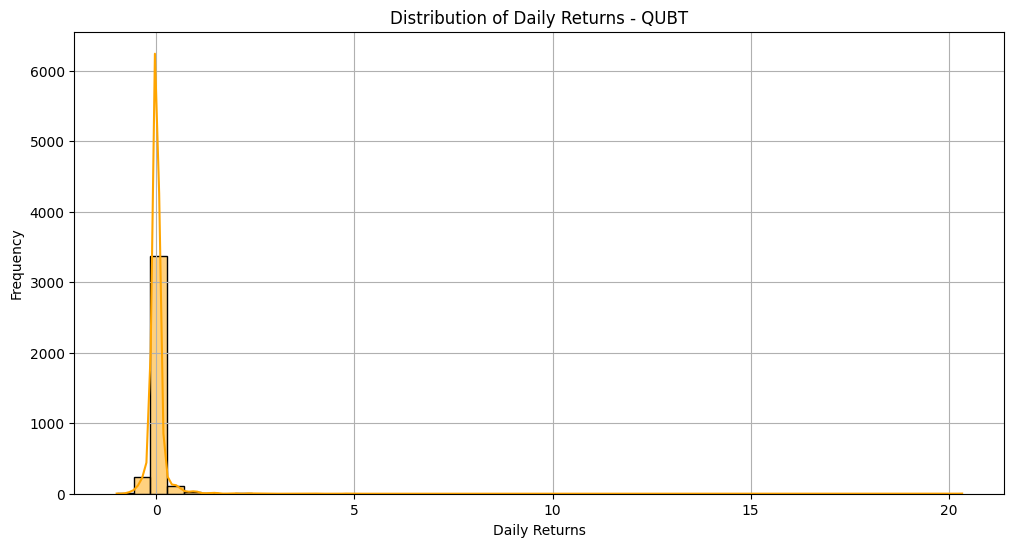

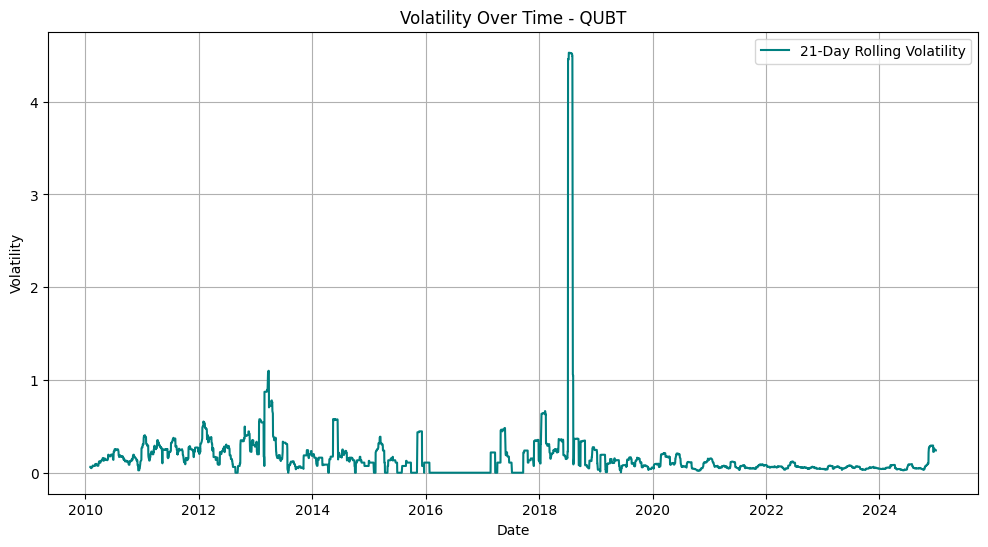

In [18]:
# Historical trends for QUBT
plt.figure(figsize=(12, 6))
plt.plot(qubt['Date'], qubt['Adj Close'], label='Adj Close Price', color='purple')
plt.title('Historical Adjusted Close Price - QUBT')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')
plt.legend()
plt.grid()
plt.show()

# Daily returns and their distribution
plt.figure(figsize=(12, 6))
sns.histplot(qubt['Returns'], kde=True, bins=50, color='orange')
plt.title('Distribution of Daily Returns - QUBT')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Volatility calculation: rolling standard deviation
qubt['Volatility'] = qubt['Returns'].rolling(window=21).std()
plt.figure(figsize=(12, 6))
plt.plot(qubt['Date'], qubt['Volatility'], label='21-Day Rolling Volatility', color='teal')
plt.title('Volatility Over Time - QUBT')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid()
plt.show()


# Comment:

1. **Price Growth:** NVDA has shown consistent price growth, with a maximum close of $148.88, whereas QUBT's maximum close was much higher at $238.00 but had lower average prices, indicating more sporadic performance.

2. **Volatility:** QUBT exhibits significantly higher price variability (std: $22.89) compared to NVDA (std: $28.03).

3. **Trading Volume:** NVDA consistently trades at much higher volumes, with an average of 497.1 million compared to QUBT's 793,259, indicating stronger market activity and interest.

4. **Quartiles:** NVDA’s price data shows steadier growth, while QUBT's figures reflect higher fluctuations and occasional spikes.


# 3.2 Stock's Performance comparison with S&P500
Download S&P500 data and calculate metrics for comparison.

In [19]:
# Download S&P500 data
sp500 = yf.download('^GSPC', start='2010-01-01', end='2024-12-31', auto_adjust=False)

# Flatten the multi-level columns in S&P500
sp500.columns = sp500.columns.droplevel(1)

# Reset index for S&P500
sp500 = sp500.reset_index()

# Ensure Returns are calculated for S&P500
sp500['Returns'] = sp500['Adj Close'].pct_change()

# Merge NVDA and S&P500 on 'Date'
nvda_merged = nvda.merge(sp500[['Date', 'Returns']], on='Date', how='inner', suffixes=('', '_sp500'))

# Merge QUBT and S&P500 on 'Date'
qubt_merged = qubt.merge(sp500[['Date', 'Returns']], on='Date', how='inner', suffixes=('', '_sp500'))

# Print head of the aligned NVDA DataFrame
nvda_merged.head()

# Print head of the aligned QUBT DataFrame
#print(qubt_merged.head())


[*********************100%***********************]  1 of 1 completed


Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Returns,Tomorrow,Stock_Direction,Volatility,Returns_sp500
0,2010-01-04,NVDA,0.423923,0.46225,0.4655,0.45275,0.46275,800204000,0.000000,0.430113,1,NaN,NaN
1,2010-01-05,NVDA,0.430113,0.46900,0.4740,0.46050,0.46050,728648000,0.014602,0.432864,1,NaN,0.003116
2,2010-01-06,NVDA,0.432864,0.47200,0.4730,0.46425,0.46875,649168000,0.006397,0.424381,0,NaN,0.000546
3,2010-01-07,NVDA,0.424381,0.46275,0.4715,0.45925,0.46950,547792000,-0.019598,0.425298,1,NaN,0.004001
4,2010-01-08,NVDA,0.425298,0.46375,0.4670,0.45625,0.45900,478168000,0.002161,0.419337,0,NaN,0.002882


In [20]:
# Drop missing values after merging
nvda_merged = nvda_merged.dropna(subset=['Returns', 'Returns_sp500'])
qubt_merged = qubt_merged.dropna(subset=['Returns', 'Returns_sp500'])

# Validate NVDA and S&P500 Returns
print("NVDA:")
print(nvda_merged[['Returns', 'Returns_sp500', 'Tomorrow', 'Volatility']].describe())

print("-----------------------------------------------------------")

# Validate QUBT and S&P500 Returns
print("QUBT:")
print(qubt_merged[['Returns', 'Returns_sp500', 'Tomorrow', 'Volatility' ]].describe())

NVDA:
Price      Returns  Returns_sp500     Tomorrow   Volatility
count  3772.000000    3772.000000  3771.000000  3753.000000
mean      0.001940       0.000497    13.954169     0.026152
std       0.028624       0.010857    28.031874     0.011790
min      -0.187559      -0.119841     0.203593     0.006414
25%      -0.012410      -0.003802     0.410739     0.017834
50%       0.001668       0.000681     3.546596     0.023188
75%       0.015876       0.005691    13.564449     0.033130
max       0.298067       0.093828   148.869751     0.086849
-----------------------------------------------------------
QUBT:
Price      Returns  Returns_sp500     Tomorrow   Volatility
count  3772.000000    3772.000000  3771.000000  3753.000000
mean      0.020357       0.000497     6.602144     0.169270
std       0.395555       0.010857    22.437020     0.356328
min      -0.995000      -0.119841     0.015000     0.000000
25%      -0.011280      -0.003802     0.650000     0.052061
50%       0.000000       0.0

# 3.3 Correllation with S&P 500

In [21]:
correlation_nvda = nvda_merged['Returns'].corr(nvda_merged['Returns_sp500'])
print(f"Correlation of NVDA Returns with S&P500: {correlation_nvda}")

correlation_qubt = qubt_merged['Returns'].corr(qubt_merged['Returns_sp500'])
print(f"Correlation of QUBT Returns with S&P500: {correlation_qubt}")


Correlation of NVDA Returns with S&P500: 0.6229867598476508
Correlation of QUBT Returns with S&P500: 0.031895673390070774


# Comment:

Correlation Analysis:

1. NVDA and S&P500: High positive correlation (0.623) suggests NVDA's performance closely aligns with market trends.

2. QUBT and S&P500: Weak correlation (0.032) indicates QUBT operates independently of broader market movements.

# Implications:

  * NVDA is a market-sensitive stock influenced by macroeconomic factors.

  * QUBT's weak correlation makes it a potential diversifier in a portfolio.

# 3.4 Regression Analysis:

# For NVDA:

In [22]:
# NVDA
X_nvda = sm.add_constant(nvda_merged['Returns_sp500'])
model_nvda = sm.OLS(nvda_merged['Returns'], X_nvda).fit()
print(model_nvda.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     2391.
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:25:30   Log-Likelihood:                 8978.5
No. Observations:                3772   AIC:                        -1.795e+04
Df Residuals:                    3770   BIC:                        -1.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.000      3.077

# Comment:

# NVDA Regression:

  * R-squared (0.388): 38.8% of NVDA's return variability is explained by S&P500 returns.

  * Coefficient (1.6425): NVDA's returns are amplified by market movements (leverage effect).

  * Significance: Extremely strong relationship (p < 0.001).

# Implications:

NVDA's returns are more predictable based on market conditions, aligning with its stability and growth profile.

# For QUBT:

In [23]:
# QUBT
X_qubt = sm.add_constant(qubt_merged['Returns_sp500'])
model_qubt = sm.OLS(qubt_merged['Returns'], X_qubt).fit()
print(model_qubt.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.839
Date:                Thu, 30 Jan 2025   Prob (F-statistic):             0.0501
Time:                        21:25:30   Log-Likelihood:                -1851.4
No. Observations:                3772   AIC:                             3707.
Df Residuals:                    3770   BIC:                             3719.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0198      0.006      3.069

# Comment:

# QUBT Regression:

1. R-squared (0.001): S&P500 explains only 0.1% of QUBT's returns, confirming independence from the market.

2. Coefficient (1.1620): Marginal sensitivity to market changes, though barely significant (p ≈ 0.05).

# Implications:

QUBT's speculative nature leads to unpredictability, minimizing its dependency on broader market indices.

# 3.5 Comparative Analysis
Calculate cumulative returns and compare volatility metrics.

Cumulative Returns

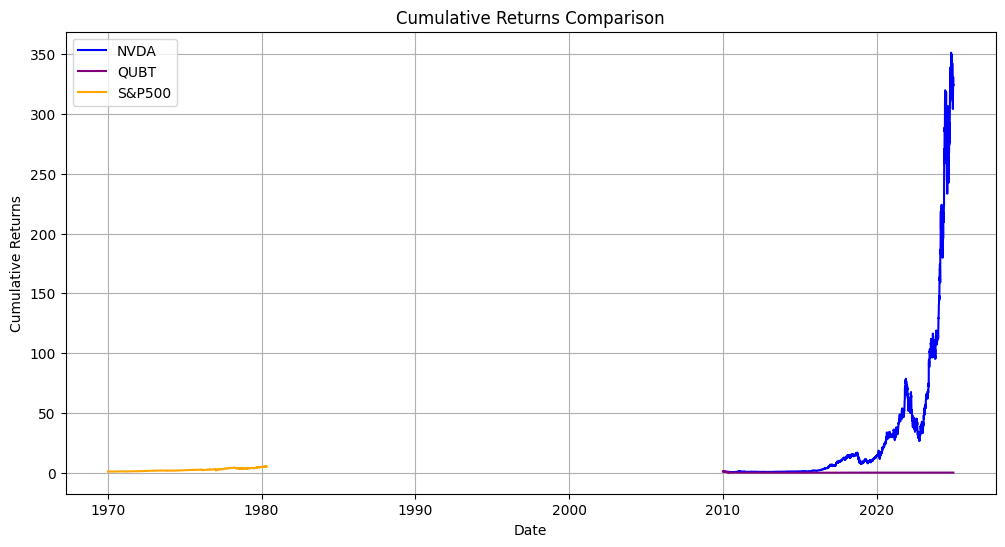

In [24]:
# Cumulative returns for NVDA, QUBT, and S&P500
nvda_merged['Cumulative_Returns'] = (1 + nvda_merged['Returns']).cumprod()
qubt_merged['Cumulative_Returns'] = (1 + qubt_merged['Returns']).cumprod()
sp500['Cumulative_Returns'] = (1 + sp500['Returns']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(nvda_merged['Date'], nvda_merged['Cumulative_Returns'], label='NVDA', color='blue')
plt.plot(qubt_merged['Date'], qubt_merged['Cumulative_Returns'], label='QUBT', color='purple')
plt.plot(sp500.index, sp500['Cumulative_Returns'], label='S&P500', color='orange')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()


# 3.6 Volatility Comparison

In [25]:
# Average volatility
nvda_volatility = nvda_merged['Volatility'].mean()
qubt_volatility = qubt_merged['Volatility'].mean()
sp500_volatility = sp500['Returns'].rolling(window=21).std().mean()

print(f"Average Volatility - NVDA: {nvda_volatility:.4f}")
print(f"Average Volatility - QUBT: {qubt_volatility:.4f}")
print(f"Average Volatility - S&P500: {sp500_volatility:.4f}")


Average Volatility - NVDA: 0.0262
Average Volatility - QUBT: 0.1693
Average Volatility - S&P500: 0.0093


# Comment:

# Volatility Comparison:

1. NVDA's volatility (2.62%) is relatively low, reflecting its status as a stable, blue-chip growth stock.

2. QUBT's high volatility (16.93%) underscores its riskiness and speculative characteristics.

  * The S&P500's average volatility (0.93%) serves as a benchmark, highlighting NVDA's market alignment and QUBT's extreme variability.

# Implications:

**NVDA is a safer investment for those seeking moderate, steady returns.**

**QUBT is suitable for traders comfortable with sharp price swings and higher risk.**


# Key Takeaways:

1. NVDA is a stable, market-sensitive growth stock appealing to long-term investors, offering steady returns with moderate risk.

2. QUBT is a speculative, independent stock better suited for short-term traders willing to accept high volatility for potential high rewards.

3. Portfolio Strategy:

  * Pairing NVDA with QUBT can balance stability and speculation, though the weak correlation of QUBT with S&P500 may serve as a diversification tool.

# 4.0 Feature Engineering & Data Enconding for Machine Learning:

Following the analysis of NVDA and QUBT, NVDA appears to be the better investment. Therefore, we will create technical indicators to analyze its stock price movement and enhance prediction accuracy.

# **4.1 Technical Indicators**

These are derived from historical price and volume data and are used to predict future movements:

1. Moving Averages (SMA, EMA): Identify trends by smoothing price data over a specified period.

2. Relative Strength Index (RSI): Measures momentum to determine if a stock is overbought or oversold.

3. Moving Average Convergence Divergence (MACD): Analyzes trend strength and momentum using moving averages.

4. Volume: Confirms the strength of price movements based on trading activity.

5. Stochastic Oscillator: Compares closing prices to a range over time to assess momentum.

6. Williams %R: Identifies overbought and oversold conditions by measuring price relative to highs and lows.

7. Price Rate of Change (ROC): Tracks the speed of price movements to gauge momentum.

In [26]:
# Technical Indicators features 
data = nvda_merged.copy()

# Ensure proper date format and sorting
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
data.reset_index(drop=True, inplace=True)

# Function to calculate technical indicators
def calculate_indicators(df):
    df['SMA_20'] = df['Adj Close'].rolling(window=20).mean()
    df['EMA_20'] = df['Adj Close'].ewm(span=20, adjust=False).mean()

    # Stochastic Oscillator
    df['14-high'] = df['High'].rolling(14).max()
    df['14-low'] = df['Low'].rolling(14).min()
    df['Stochastic_Oscillator'] = (df['Adj Close'] - df['14-low']) / (df['14-high'] - df['14-low']) * 100

    # Williams %R
    df['Williams_%R'] = (df['14-high'] - df['Adj Close']) / (df['14-high'] - df['14-low']) * -100

    # Relative Strength Index (RSI)
    delta = df['Adj Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(14).mean()
    avg_loss = loss.rolling(14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Price Rate of Change (ROC)
    df['Price_ROC'] = df['Adj Close'].pct_change(periods=10) * 100

    # MACD
    ema_12 = df['Adj Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Adj Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26

    # Drop intermediate columns
    df.drop(['14-high', '14-low'], axis=1, inplace=True)

    return df

# Calculate indicators
data = calculate_indicators(data)

# Drop NaN values from rolling calculations
data.dropna(inplace=True)

# Display first 5 rows
data.head()

Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Returns,Tomorrow,Stock_Direction,Volatility,Returns_sp500,Cumulative_Returns,SMA_20,EMA_20,Stochastic_Oscillator,Williams_%R,RSI,Price_ROC,MACD
19,2010-02-02,NVDA,0.383800,0.41850,0.42375,0.41150,0.41275,849812000,0.010260,0.387010,1,0.028114,0.012973,0.905354,0.396639,0.392264,7.163462,-92.836538,42.487926,-3.958665,-0.013935
20,2010-02-03,NVDA,0.387010,0.42200,0.42375,0.41275,0.41475,562296000,0.008363,0.364541,0,0.028238,-0.005474,0.912926,0.394484,0.391763,12.374328,-87.625672,41.543492,-2.764997,-0.012617
21,2010-02-04,NVDA,0.364541,0.39750,0.41825,0.39300,0.41825,783480000,-0.058057,0.371878,1,0.030232,-0.031141,0.859924,0.391068,0.389171,-22.643302,-122.643302,37.260663,-6.744891,-0.013233
22,2010-02-05,NVDA,0.371878,0.40550,0.40650,0.39000,0.39700,604856000,0.020126,0.371190,0,0.030690,0.002897,0.877231,0.388443,0.387524,-10.951390,-110.951390,43.247316,-1.458083,-0.012979
23,2010-02-08,NVDA,0.371190,0.40475,0.41450,0.39675,0.40425,445160000,-0.001850,0.368210,0,0.030563,-0.008863,0.875608,0.385737,0.385968,-12.047545,-112.047545,40.158720,-3.285584,-0.012688


In [27]:
data.describe()

Price,Date,Adj Close,Close,High,Low,Open,Volume,Returns,Tomorrow,Stock_Direction,Volatility,Returns_sp500,Cumulative_Returns,SMA_20,EMA_20,Stochastic_Oscillator,Williams_%R,RSI,Price_ROC,MACD
count,3752,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3.752000e+03,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,2017-07-14 22:59:44.648187648,13.986291,14.015241,14.269269,13.738027,14.016644,4.961326e+08,0.001976,14.022833,0.529051,0.026153,0.000513,32.992556,13.642102,13.639678,30.291269,-69.708731,55.031963,1.965104,0.256843
min,2010-02-02 00:00:00,0.203593,0.222000,0.226250,0.216250,0.218000,4.564400e+07,-0.187559,0.203593,0.000000,0.006414,-0.119841,0.480260,0.215412,0.219002,-148.177463,-248.177463,2.978802,-32.312047,-5.167070
25%,2013-10-22 18:00:00,0.414752,0.444750,0.452250,0.438437,0.446313,3.028740e+08,-0.012258,0.414924,0.000000,0.017834,-0.003775,0.978367,0.416686,0.422214,0.153817,-99.846183,42.345868,-3.138786,-0.005075
50%,2017-07-15 12:00:00,3.571315,3.611500,3.669625,3.557750,3.612625,4.277150e+08,0.001680,3.575142,1.000000,0.023191,0.000681,8.424450,3.596071,3.617203,35.279344,-64.720656,54.991458,1.658861,0.009062
75%,2021-04-07 06:00:00,13.595156,13.633687,13.873625,13.387812,13.728188,6.006220e+08,0.015936,13.604691,1.000000,0.033141,0.005699,32.069899,13.456705,13.422845,71.700197,-28.299803,67.348331,6.929129,0.144166
max,2024-12-27 00:00:00,148.869751,148.880005,152.889999,146.259995,149.350006,3.692928e+09,0.298067,148.869751,1.000000,0.086849,0.093828,351.171985,143.135635,142.700157,99.965338,-0.034662,99.429364,56.291786,9.774669
std,NaN,28.014540,28.011093,28.530374,27.454924,28.039194,3.067596e+08,0.028623,28.086122,0.499222,0.011791,0.010860,66.084088,27.280144,27.239191,47.799454,47.799454,17.091484,8.955177,1.092248


In [28]:
# Count NaN values before removal
nan_count_before = data.isnull().sum().sum()
print(f"Number of NaN values before removal: {nan_count_before}")

# Remove rows with any NaN values
data.dropna(inplace=True)

# Count NaN values after removal
nan_count_after = data.isnull().sum().sum()
print(f"Number of NaN values after removal: {nan_count_after}")

Number of NaN values before removal: 0
Number of NaN values after removal: 0


In [29]:
data.columns

Index(['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Returns', 'Tomorrow', 'Stock_Direction', 'Volatility', 'Returns_sp500',
       'Cumulative_Returns', 'SMA_20', 'EMA_20', 'Stochastic_Oscillator',
       'Williams_%R', 'RSI', 'Price_ROC', 'MACD'],
      dtype='object', name='Price')

# 4.2 Data Splitting and Scaling

In [30]:
# Data Splitting 

X = data.dropna().drop(columns=['Stock_Direction', 'Ticker', 'Date'])  
y = data['Stock_Direction']


# Specify a random seed
seed = 42 # to ensure reproducibility
random_state = seed

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=seed)

print("X_train shape: ", X_train.shape, "; y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "; y_test shape: ", y_test.shape)
#check the first row for X-train data
X_train.head(2)

X_train shape:  (3001, 18) ; y_train shape:  (3001,)
X_test shape:  (751, 18) ; y_test shape:  (751,)


Price,Adj Close,Close,High,Low,Open,Volume,Returns,Tomorrow,Volatility,Returns_sp500,Cumulative_Returns,SMA_20,EMA_20,Stochastic_Oscillator,Williams_%R,RSI,Price_ROC,MACD
2257,3.213178,3.23925,3.4375,3.2115,3.40425,863740000,-0.040932,3.151429,0.036673,-0.020588,7.579634,3.723622,3.772360,0.145259,-99.854741,24.379508,-12.221383,-0.338137
504,0.325565,0.35500,0.3565,0.3480,0.35125,347372000,0.011396,0.337258,0.024048,0.000188,0.767983,0.323651,0.324146,-6.774411,-106.774411,50.899631,7.902745,-0.003927


In [31]:
# Scaling the X predictors (for linear Regression and Polynomial features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit scaler to the training data
X_test_scaled = scaler.transform(X_test)       # fit scaler to the test data

print("Number of features in training data:", X_train_scaled.shape[1])
print("Number of features in test data:", X_test_scaled.shape[1])

Number of features in training data: 18
Number of features in test data: 18


# 4.3  Correlation Matrix Heatmap

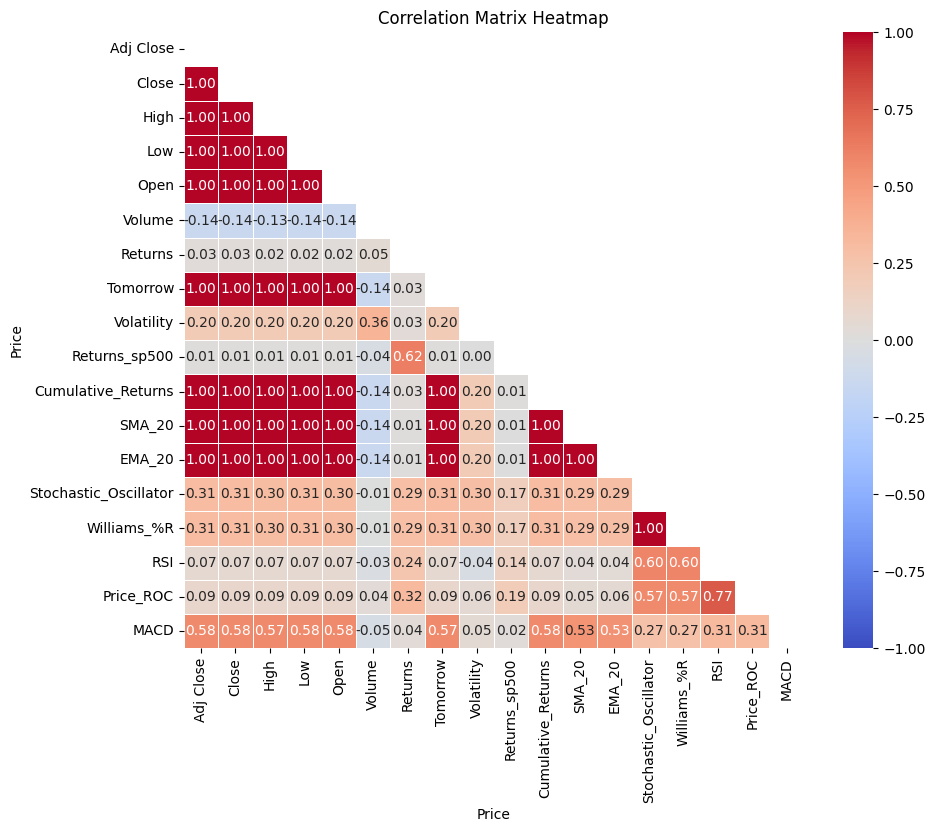

In [32]:
# Calculate correlation matrix
corr_matrix =X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

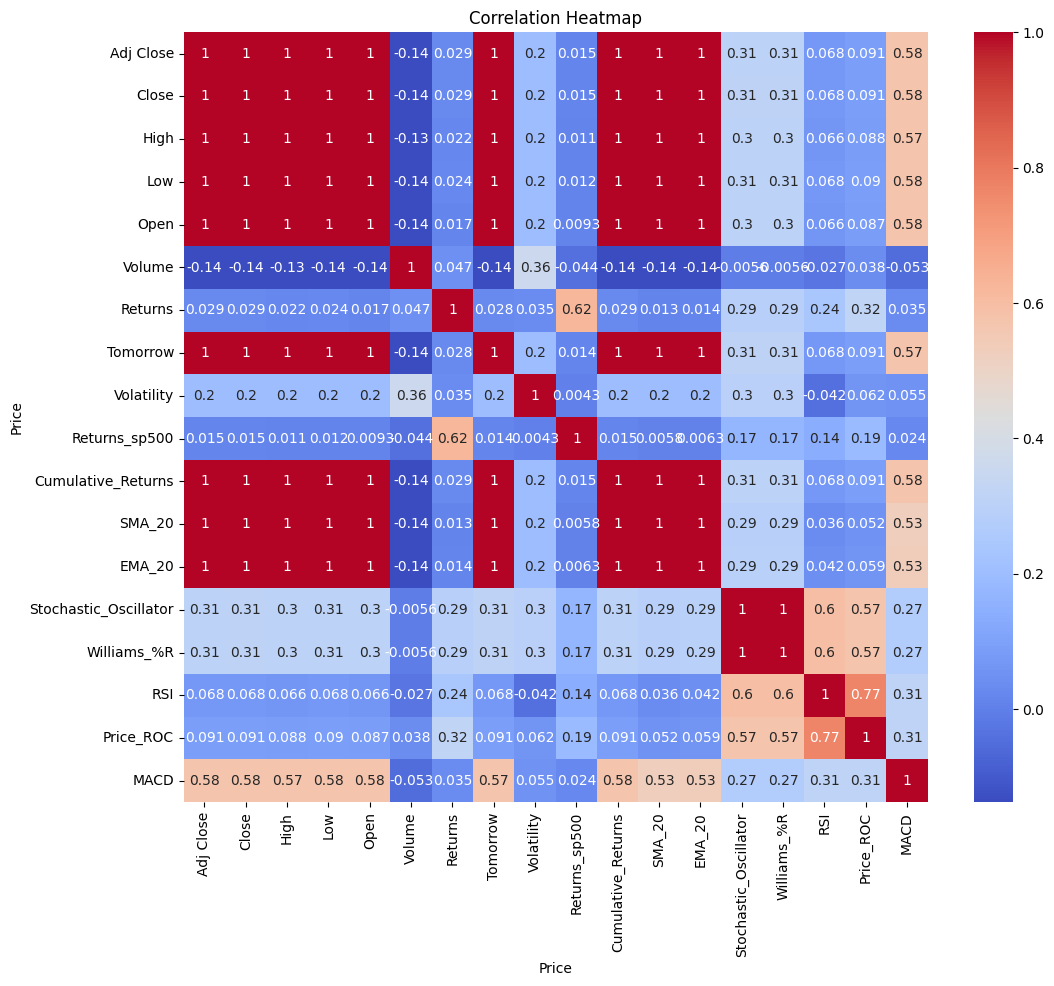


Features to remove due to high VIF (> 5):
0                 Adj Close
13    Stochastic_Oscillator
10       Cumulative_Returns
14              Williams_%R
1                     Close
2                      High
3                       Low
12                   EMA_20
4                      Open
11                   SMA_20
7                  Tomorrow
Name: Feature, dtype: object

Features to keep (VIF <= 5):
17             MACD
15              RSI
16        Price_ROC
6           Returns
9     Returns_sp500
8        Volatility
5            Volume
Name: Feature, dtype: object

Shape of data after removing highly correlated features: (3752, 8)


c:\Users\Kenny Ogundana\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\Kenny Ogundana\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [33]:
# Calculate correlation matrix and display top correlated features
correlation_matrix = X.corr()
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Extract highly correlated features (with correlation > 0.75)
high_corr = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
high_corr = high_corr[high_corr > 0.75]

# print("Highly correlated features (correlation > 0.75):")
# print(high_corr)

# Calculate Variance Inflation Factor (VIF)
# Add a constant (intercept) for VIF calculation
X['Intercept'] = 1
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Drop the intercept for clarity
vif_data = vif_data[vif_data['Feature'] != 'Intercept']
# Sort VIF data by highest VIF values
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# print("\nVariance Inflation Factor (VIF) for features:")
# print(vif_data)

# Step 4: Identify features to remove based on VIF > 5 (common threshold)
features_to_remove = vif_data[vif_data['VIF'] > 5]['Feature']
features_to_keep = vif_data[vif_data['VIF'] <= 5]['Feature']

print("\nFeatures to remove due to high VIF (> 5):")
print(features_to_remove)

print("\nFeatures to keep (VIF <= 5):")
print(features_to_keep)

# Remove features with high VIF
X_cleaned = X.drop(columns=features_to_remove)
print("\nShape of data after removing highly correlated features:", X_cleaned.shape)


# Variance Inflation Factor (VIF) Analysis
1. High VIF Features (to remove):

  * Features such as Adj Close, Close, High, Low, Open, SMA_20, EMA_20, etc., exhibit multicollinearity (VIF > 5), meaning they are highly correlated with other features and do not contribute new information.

2. Low VIF Features (to keep):

  * Features like MACD, RSI, Price_ROC, Returns, Returns_sp500, Volatility, and Volume have low VIF values (≤ 5), indicating they provide independent and useful information.

# 4.4 Dimensionality Reduction with PCA -Normal Regression

In [34]:
# pca 
pca = PCA(random_state=42)
pca.fit(X_train_scaled)

cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.535997,0.535997
1,0.713034,0.177038
2,0.793360,0.080325
3,0.867366,0.074006
4,0.915364,0.047998
5,0.944348,0.028984
6,0.968565,0.024217
7,0.987734,0.019169
8,0.999726,0.011992
9,0.999900,0.000174


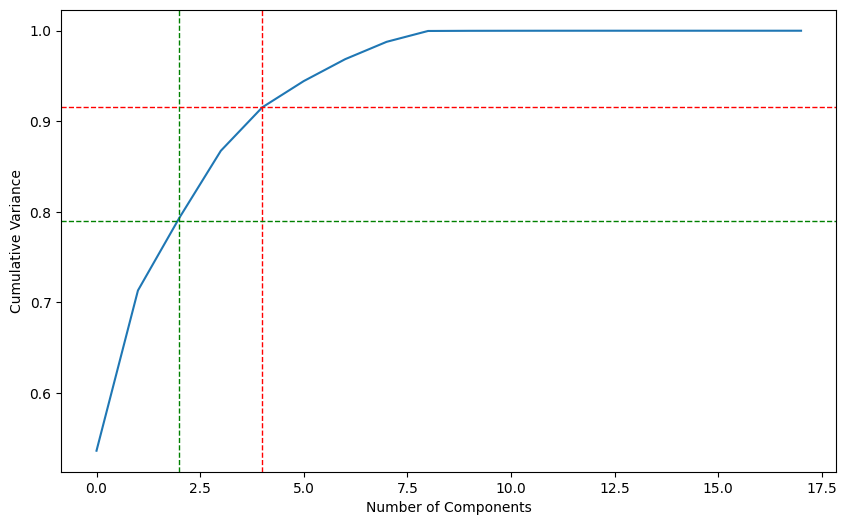

In [35]:
 #Plotting the data
fig = plt.figure(figsize = (10,6))
plt.plot(cvr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
# Draw lines to illustrate vertical and horizontal limits
plt.axhline(y = 0.916154, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x = 4 , color='red', linestyle='dashed', linewidth=1)
plt.axhline(y = 0.79, color='green', linestyle='dashed', linewidth=1)
plt.axvline(x = 2, color='green', linestyle='dashed', linewidth=1)

In [36]:
# Perform PCA with 4 components
n_components = 4  
pca_4 = PCA(n_components=n_components)

# Ensure X_train_scaled is a DataFrame
if isinstance(X_train_scaled, np.ndarray):
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Fit and transform PCA
X_pca = pca_4.fit_transform(X_train_scaled)

# Get the actual number of components used
actual_components = pca_4.n_components_

# Create a DataFrame for PCA loadings (coefficients)
loadings_df = pd.DataFrame(
    pca_4.components_, 
    columns=X_train_scaled.columns,  
    index=[f'PC{i+1}' for i in range(actual_components)]
)

# Display PCA explained variance ratio
explained_variance = pca_4.explained_variance_ratio_
print(f"Explained Variance Ratio for each Principal Component: {explained_variance}")

# Display the PCA loadings DataFrame
print("Loadings (Coefficients) of Each Feature on Each Principal Component:")
loadings_df


Explained Variance Ratio for each Principal Component: [0.53599666 0.17703781 0.08032527 0.07400644]
Loadings (Coefficients) of Each Feature on Each Principal Component:


Price,Adj Close,Close,High,Low,Open,Volume,Returns,Tomorrow,Volatility,Returns_sp500,Cumulative_Returns,SMA_20,EMA_20,Stochastic_Oscillator,Williams_%R,RSI,Price_ROC,MACD
PC1,0.319530,0.319533,0.319396,0.319498,0.319347,-0.041713,0.018733,0.319369,0.077225,0.013121,0.319530,0.317053,0.317600,0.129915,0.129915,0.046073,0.055609,0.192455
PC2,-0.062384,-0.062341,-0.064853,-0.063540,-0.065743,0.044790,0.297674,-0.062719,0.090240,0.229456,-0.062384,-0.081429,-0.078214,0.444544,0.444544,0.447945,0.451047,0.091303
PC3,0.019295,0.019241,0.015219,0.017997,0.014589,-0.474492,0.435689,0.018114,-0.493056,0.527157,0.019295,0.017928,0.016928,-0.173403,-0.173403,-0.016129,-0.028586,-0.000007
PC4,0.013549,0.013574,0.012526,0.009812,0.009256,0.436586,0.433209,0.012894,0.480432,0.439011,0.013549,0.027410,0.024525,-0.030029,-0.030029,-0.321988,-0.203915,-0.220695


# Principal Component Analysis (PCA)
  * The first principal component (PC1) explains 53.6% of the variance.
  * The top three components (PC1, PC2, PC3) capture 79.3% of the variance.
  * A cumulative variance of 94.4% is achieved by the first six components.

# 4.5 Automatic Feature Selection

In [37]:
# Feature selection using KBest

selector = SelectKBest(score_func=f_classif, k=10)
X_kbest = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features (KBest):", selected_features)

Selected Features (KBest): Index(['Returns', 'Tomorrow', 'Returns_sp500', 'SMA_20', 'EMA_20',
       'Stochastic_Oscillator', 'Williams_%R', 'RSI', 'Price_ROC', 'MACD'],
      dtype='object', name='Price')


c:\Users\Kenny Ogundana\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Kenny Ogundana\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


# Automatic Feature Selection (AFS - KBest)
  * The top selected features include Returns, Tomorrow, Returns_sp500, SMA_20, EMA_20, Stochastic_Oscillator, Williams_%R, RSI, Price_ROC, and MACD.
  * Some features that were flagged for high VIF (SMA_20, EMA_20, Stochastic_Oscillator, Williams_%R) were still selected.

# 5.0 Model Selection, Building, and Training

For this analysis, we will use a combination of traditional statistical models, machine learning (ML) models, and deep learning (DL) models to predict stock price movements.

**Taditional Model**
1. **ARIMA:** A time-series forecasting model that captures trends and seasonality.

**Machine Learning (ML) Models**

2. **KNN Classifier:** Classifies data points based on their nearest neighbors.

3. **Decision Tree:** A rule-based model that splits data into decision nodes for classification.

4. Random Forest: An ensemble of decision trees that improves accuracy and reduces overfitting.

5. **XGBoost:** A gradient boosting algorithm optimized for high performance.

6. **SVM (Support Vector Machine):** Classifies data by finding the optimal hyperplane.

7. **Logistic Regression:** A statistical model used for binary classification.

**Deep Learning (DL) Models**

8. **LSTM (Long Short-Term Memory):** A recurrent neural network (RNN) designed for sequential data.

9. **CNN-LSTM:** A hybrid deep learning model that combines CNN for feature extraction and LSTM for sequential analysis.

# 5.1 ARIMA Model Classification

In [38]:

# Extract tickers from the dataset
tickers = data["Ticker"].unique().tolist()

# --- Data Processing ---
def process_stock_data(data, tickers):
    processed_data = []
    for ticker in tickers:
        df = data[data['Ticker'] == ticker].copy()
        df['Returns'] = df['Adj Close'].pct_change().fillna(0)
        df['Tomorrow'] = df['Adj Close'].shift(-1)
        df['Stock_Direction'] = (df['Tomorrow'] > df['Adj Close']).astype(int)
        df['Volatility'] = df['Returns'].rolling(window=20).std()
        processed_data.append(df)
    return pd.concat(processed_data).reset_index()

# # --- ARIMA Classification Model ---

def arima_classification(data, ticker, order=(5,1,0)):
    ticker_data = data[data['Ticker'] == ticker]
    ticker_data = ticker_data.set_index('Date')
    
    train_size = int(len(ticker_data) * 0.8)
    train, test = ticker_data.iloc[:train_size], ticker_data.iloc[train_size:]
    
    # Train model on training data
    model = ARIMA(train['Adj Close'], order=order)
    model_fit = model.fit()
    
    # Predictions for training set
    train_predictions = model_fit.predict(start=train.index[0], end=train.index[-1])
    train_predicted_direction = (train_predictions.diff().fillna(0) > 0).astype(int)
    train_actual_direction = (train['Adj Close'].diff().fillna(0) > 0).astype(int)
    
    # Predictions for test set
    test_predictions = model_fit.forecast(steps=len(test))
    test_predicted_direction = (test_predictions.diff().fillna(0) > 0).astype(int)
    test_actual_direction = (test['Adj Close'].diff().fillna(0) > 0).astype(int)
    
    # Compute accuracy
    train_accuracy = accuracy_score(train_actual_direction, train_predicted_direction)
    test_accuracy = accuracy_score(test_actual_direction, test_predicted_direction)
    
    print(f'ARIMA Model Accuracy for {ticker} - Train: {train_accuracy:.2f}, Test: {test_accuracy:.2f}')
    
    return train_accuracy, test_accuracy


#--- Perform Analysis ---
# Process the data
processed_data = process_stock_data(data, tickers)
# Run ARIMA classification
arima_classification(processed_data, 'NVDA')



c:\Users\Kenny Ogundana\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Kenny Ogundana\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Kenny Ogundana\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Accuracy for NVDA - Train: 0.48, Test: 0.47


c:\Users\Kenny Ogundana\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Kenny Ogundana\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(0.47884038653782074, 0.4673768308921438)

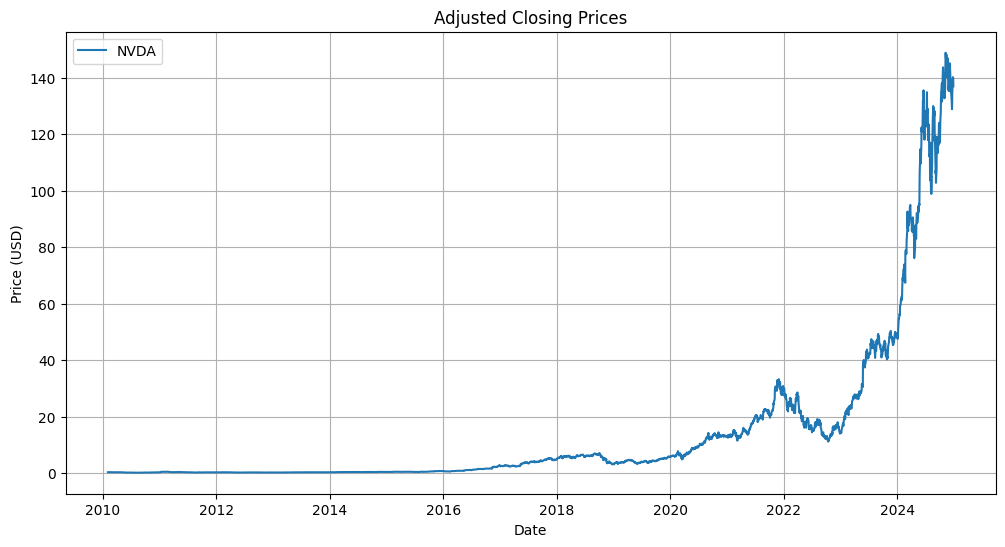

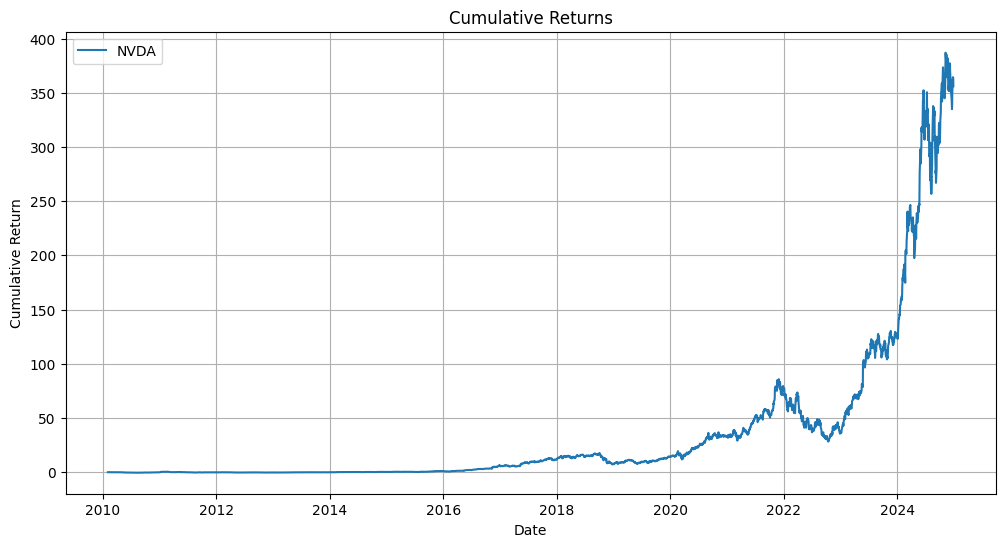

In [39]:
# --- Visualization Functions ---
def plot_adjusted_close(data, tickers):
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        ticker_data = data[data['Ticker'] == ticker]
        plt.plot(ticker_data['Date'], ticker_data['Adj Close'], label=ticker)
    plt.title('Adjusted Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

def plot_cumulative_returns(data, tickers):
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        ticker_data = data[data['Ticker'] == ticker]
        cumulative_returns = (1 + ticker_data['Returns']).cumprod() - 1
        plt.plot(ticker_data['Date'], cumulative_returns, label=ticker)
    plt.title('Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid()
    plt.show()

# Visualization
plot_adjusted_close(processed_data, tickers)
plot_cumulative_returns(processed_data, tickers)

# 5.2 Machine Leaning Models

In [40]:
X = data.dropna().drop(columns=['Stock_Direction', 'Ticker', 'Date'])  
y = data['Stock_Direction']


# Specify a random seed
seed = 42 # to ensure reproducibility
random_state = seed

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=seed)

print("X_train shape: ", X_train.shape, "; y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "; y_test shape: ", y_test.shape)
#check the first row for X-train data
X_train.head(2)

X_train shape:  (3001, 18) ; y_train shape:  (3001,)
X_test shape:  (751, 18) ; y_test shape:  (751,)


Price,Adj Close,Close,High,Low,Open,Volume,Returns,Tomorrow,Volatility,Returns_sp500,Cumulative_Returns,SMA_20,EMA_20,Stochastic_Oscillator,Williams_%R,RSI,Price_ROC,MACD
2257,3.213178,3.23925,3.4375,3.2115,3.40425,863740000,-0.040932,3.151429,0.036673,-0.020588,7.579634,3.723622,3.772360,0.145259,-99.854741,24.379508,-12.221383,-0.338137
504,0.325565,0.35500,0.3565,0.3480,0.35125,347372000,0.011396,0.337258,0.024048,0.000188,0.767983,0.323651,0.324146,-6.774411,-106.774411,50.899631,7.902745,-0.003927


In [41]:
# Feature selection using KBest
#X = data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Returns', 'Tomorrow',  'Volatility', 'Returns_sp500']]
#X = data[['Returns_sp500', 'Volatility', 'RSI','Williams_%R','Stochastic_Oscillator', 'Price_ROC','Volume','Returns', 'Cumulative_Returns' ]] # 'Adj Close'
X = data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Returns', 'Tomorrow',  'Volatility', 'Returns_sp500',
       'Cumulative_Returns', 'SMA_20', 'EMA_20', 'Stochastic_Oscillator',
       'Williams_%R', 'RSI', 'Price_ROC', 'MACD']]
y = data['Stock_Direction']


# Specify a random seed
seed = 42 # to ensure reproducibility
random_state = seed

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=seed)

print("X_train shape: ", X_train.shape, "; y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "; y_test shape: ", y_test.shape)
#check the first row for X-train data
X_train.head(2)

# Scaling the X predictors (for linear Regression and Polynomial features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit scaler to the training data
X_test_scaled = scaler.transform(X_test)       # fit scaler to the test data

print("Number of features in training data:", X_train_scaled.shape[1])
print("Number of features in test data:", X_test_scaled.shape[1])

X_train shape:  (3001, 18) ; y_train shape:  (3001,)
X_test shape:  (751, 18) ; y_test shape:  (751,)
Number of features in training data: 18
Number of features in test data: 18


In [42]:
# # 5. Model Building - Machine Learning Models with Hyperparameter Tuning
# models = {
#     "XGBoost": (XGBClassifier(), {"learning_rate": [0.01, 0.1], "n_estimators": [50, 100]}),
#     "Random Forest": (RandomForestClassifier(), {"n_estimators": [50, 100], "max_depth": [None, 10]}),
#     "Decision Tree": (DecisionTreeClassifier(), {"max_depth": [None, 10, 20]}),
#     "KNN": (KNeighborsClassifier(), {"n_neighbors": [5, 10]}),
#     "Logistic Regression": (LogisticRegression(), {"C": [0.1, 1.0, 10.0]})
# }

# results = []

# for model_name, (model, params) in models.items():
#     grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5)
#     #grid.fit(X_train_pca, y_train)
#     grid.fit(X_train, y_train)
#     best_model = grid.best_estimator_
#    # train_accuracy = accuracy_score(y_train, best_model.predict(X_train_pca))
#     train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
#    # test_accuracy = accuracy_score(y_test, best_model.predict(X_test_pca))
#     test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
#     results.append((model_name, grid.best_params_, train_accuracy, test_accuracy))

# results_df = pd.DataFrame(results, columns=["Model", "Best Parameters", "Train Accuracy", "Test Accuracy"])
# results_df = results_df.sort_values("Test Accuracy", ascending=False)
# print(results_df)


In [43]:

# Define the models
models = {
    "RandomForestClassifier": RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=1,
        random_state=42,
    ),
    "XGBClassifier": xgb.XGBClassifier(
        n_estimators=300, max_depth=3, learning_rate=0.3, min_child_weight=6,  random_state=42
    ),
    "KNNClassifier": KNeighborsClassifier(n_neighbors= 5),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "SVMClassifier": SVC(probability=True, random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
}

# Fit the models and compute classification metrics for both train and test sets
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    y_test_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Compute metrics for train and test sets
    metrics_train = {
        "accuracy": accuracy_score(y_train, y_train_pred),
        "precision": precision_score(y_train, y_train_pred, average="weighted"),
        "recall": recall_score(y_train, y_train_pred, average="weighted"),
        "f1_score": f1_score(y_train, y_train_pred, average="weighted"),
    }
    metrics_test = {
        "accuracy": accuracy_score(y_test, y_test_pred),
        "precision": precision_score(y_test, y_test_pred, average="weighted"),
        "recall": recall_score(y_test, y_test_pred, average="weighted"),
        "f1_score": f1_score(y_test, y_test_pred, average="weighted"),
        "roc_auc": roc_auc_score(y_test, y_test_pred_proba) if y_test_pred_proba is not None else "N/A",
    }

    results.append(
        [name]
        + [metrics_train["accuracy"], metrics_test["accuracy"]]
        + [metrics_train["precision"], metrics_test["precision"]]
        + [metrics_train["recall"], metrics_test["recall"]]
        + [metrics_train["f1_score"], metrics_test["f1_score"]]
        + [metrics_test["roc_auc"]]
    )

# Convert results to DataFrame
results_df = pd.DataFrame(
    results,
    columns=[
        "Model",
        "Accuracy (Train)",
        "Accuracy (Test)",
        "Precision (Train)",
        "Precision (Test)",
        "Recall (Train)",
        "Recall (Test)",
        "F1-Score (Train)",
        "F1-Score (Test)",
        "ROC AUC (Test)",
    ],
)

# Display the results
results_df_sorted = results_df.sort_values(by="Accuracy (Test)", ascending=False)
results_df_sorted


,Model,Accuracy (Train),Accuracy (Test),Precision (Train),Precision (Test),Recall (Train),Recall (Test),F1-Score (Train),F1-Score (Test),ROC AUC (Test)
1,XGBClassifier,0.941020,0.669774,0.941796,0.670187,0.941020,0.669774,0.940905,0.667860,0.733670
5,LogisticRegression,0.623126,0.615180,0.635940,0.627791,0.623126,0.615180,0.602489,0.596286,0.697052
0,RandomForestClassifier,0.999334,0.613848,0.999334,0.614778,0.999334,0.613848,0.999334,0.608207,0.633709
3,DecisionTreeClassifier,1.000000,0.601864,1.000000,0.601634,1.000000,0.601864,1.000000,0.601723,0.600687
4,SVMClassifier,0.563479,0.531292,0.601183,0.531823,0.563479,0.531292,0.481130,0.452019,0.517499
2,KNNClassifier,0.686105,0.515313,0.685661,0.513356,0.686105,0.515313,0.685676,0.513280,0.496499


# 5.3 Deep Learning Models
# LSTM and CNN-LSTM

In [44]:
# # Scaling the X predictors 
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X) # fit scaler to the training data
# #X_test_scaled = scaler.transform(X_test)       # fit scaler to the test data


# # Check for GPU
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # ----------------- Data Preparation -----------------
# X_lstm = np.expand_dims(X_scaled, axis=2)  # Add feature dimension
# y_lstm = y.values

# X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
#     X_lstm, y_lstm, test_size=0.2, random_state=42
# )

# # Convert to Torch tensors
# train_dataset = TensorDataset(
#     torch.tensor(X_train_lstm, dtype=torch.float32), torch.tensor(y_train_lstm, dtype=torch.float32)
# )
# test_dataset = TensorDataset(
#     torch.tensor(X_test_lstm, dtype=torch.float32), torch.tensor(y_test_lstm, dtype=torch.float32)
# )

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# # ----------------- Define LSTM Model -----------------
# class LSTMModel(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(LSTMModel, self).__init__()
#         self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         _, (hn, _) = self.lstm(x)
#         out = self.fc(hn[-1])
#         return out

# # ----------------- Define CNN-LSTM Model -----------------
# class CNN_LSTM_Model(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(CNN_LSTM_Model, self).__init__()
#         self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=32, kernel_size=3, padding=1)
#         self.lstm = nn.LSTM(32, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         x = x.permute(0, 2, 1)  # Reshape for CNN
#         x = F.relu(self.conv1(x))
#         x = x.permute(0, 2, 1)  # Reshape back for LSTM
#         _, (hn, _) = self.lstm(x)
#         out = self.fc(hn[-1])
#         return out

# # ----------------- Model Training Function -----------------
# def train_model(model, train_loader, test_loader, epochs=20, lr=0.001):
#     model.to(device)
#     criterion = nn.BCEWithLogitsLoss()
#     optimizer = optim.Adam(model.parameters(), lr=lr)

#     for epoch in range(epochs):
#         model.train()
#         total_loss = 0

#         for X_batch, y_batch in train_loader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             optimizer.zero_grad()
#             outputs = model(X_batch).squeeze()
#             loss = criterion(outputs, y_batch)
#             loss.backward()
#             optimizer.step()
#             total_loss += loss.item()

#         print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

#     return model

# # ----------------- Model Evaluation Function -----------------
# def evaluate_model(model, data_loader, dataset_type="Test"):
#     model.eval()
#     y_pred = []
#     y_true = []
    
#     with torch.no_grad():
#         for X_batch, y_batch in data_loader:
#             X_batch = X_batch.to(device)
#             outputs = model(X_batch).squeeze()
#             probs = torch.sigmoid(outputs)  # Convert logits to probabilities
#             predictions = torch.round(probs)  # Convert probabilities to binary labels
#             y_pred.extend(predictions.cpu().numpy())
#             y_true.extend(y_batch.numpy())
    
#     # Compute Accuracy
#     accuracy = accuracy_score(y_true, y_pred)
#     print(f"{dataset_type} Accuracy: {accuracy:.4f}")
#     return accuracy


#     # Classification Report
#     print("\nClassification Report:\n", classification_report(y_true, y_pred))

#     # Confusion Matrix
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(6, 5))
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
#     plt.xlabel("Predicted")
#     plt.ylabel("Actual")
#     plt.title("Confusion Matrix")
#     plt.show()

#     # ROC Curve
#     fpr, tpr, _ = roc_curve(y_true, y_pred)
#     roc_auc = auc(fpr, tpr)

#     plt.figure(figsize=(6, 5))
#     plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
#     plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
#     plt.xlabel("False Positive Rate")
#     plt.ylabel("True Positive Rate")
#     plt.title("ROC Curve")
#     plt.legend()
#     plt.show()

# # ----------------- Train and Evaluate LSTM -----------------
# print("\nTraining LSTM Model...")
# lstm_model = train_model(LSTMModel(input_size=X_train_lstm.shape[2], hidden_size=64, output_size=1), train_loader, test_loader)

# print("\nEvaluating LSTM Model...")
# train_accuracy = evaluate_model(lstm_model, train_loader, "Train")
# test_accuracy = evaluate_model(lstm_model, test_loader, "Test")

# # ----------------- Train and Evaluate CNN-LSTM -----------------
# print("\nTraining CNN-LSTM Model...")
# cnn_lstm_model = train_model(CNN_LSTM_Model(input_size=X_train_lstm.shape[2], hidden_size=64, output_size=1), train_loader, test_loader)

# print("\nEvaluating CNN-LSTM Model...")
# train_accuracy = evaluate_model(cnn_lstm_model, train_loader, "Train")
# test_accuracy = evaluate_model(cnn_lstm_model, test_loader, "Test")




# Model Comparison -ARIMA, ML & DL

In [45]:
# --- Model Evaluation DataFrame ---

# Define the data
data = {
    "Models": [
        "XGBClassifier", "LogisticRegression", "RandomForestClassifier", 
        "DecisionTreeClassifier", "SVMClassifier", "KNNClassifier", 
        "ARIMA", "LSTM Model", "CNN-LSTM Model"
    ],
    "Train Accuracy": [
        0.940020, 0.623126, 0.999667, 
        1.000000, 0.563812, 0.686105, 
        0.478840, 0.5372, 0.5465
    ],
    "Test Accuracy": [
        0.673768, 0.615180, 0.613848, 
        0.601864, 0.531292, 0.515313, 
        0.467377, 0.5087, 0.4834
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

# Save to CSV if needed
#df.to_csv("model_performance.csv", index=False)


,Models,Train Accuracy,Test Accuracy
0,XGBClassifier,0.940020,0.673768
1,LogisticRegression,0.623126,0.615180
2,RandomForestClassifier,0.999667,0.613848
3,DecisionTreeClassifier,1.000000,0.601864
4,SVMClassifier,0.563812,0.531292
5,KNNClassifier,0.686105,0.515313
6,ARIMA,0.478840,0.467377
7,LSTM Model,0.537200,0.508700
8,CNN-LSTM Model,0.546500,0.483400


# Key Insights:
1. Low Predictive Performance Across Time Series Models

  * CNN-LSTM has the highest training accuracy (0.5465), but generalization is weak (0.4834 test accuracy), showing slight overfitting.
  * LSTM performs slightly better than ARIMA (0.5087 vs. 0.4674).
  * ARIMA is the most stable but has the lowest accuracy, suggesting it struggles with capturing nonlinear relationships.

2. Deep Learning vs. Traditional Methods:

  * Deep learning models (LSTM, CNN-LSTM) outperform ARIMA, indicating that complex patterns exist that ARIMA fails to model.

  * However, they still don’t generalize well, meaning further tuning is needed.

**Final Takeaways**

1. XGBoost is the best overall classifier with 0.6538 test accuracy, but it requires regularization to reduce overfitting.
2. Logistic Regression performs consistently well and is the most generalizable model (0.6152 test accuracy).
3. Decision Tree and Random Forest suffer from extreme overfitting and need pruning or feature selection.
4. Deep learning models (LSTM, CNN-LSTM) outperform ARIMA but need more tuning to improve test accuracy.
5. ARIMA is the weakest model overall, struggling with capturing complex time-series trends.

# 5.4 Chosen Models - XGBoost Classifier & Logistic Regression

--- Evaluating XGBClassifier ---
Accuracy: 0.6591
Precision: 0.6589
Recall: 0.7226
F1 Score: 0.6893
AUC-ROC: 0.7278


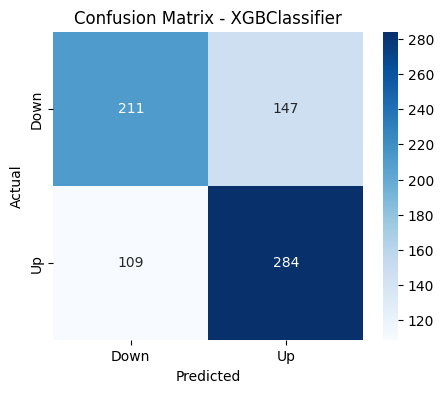

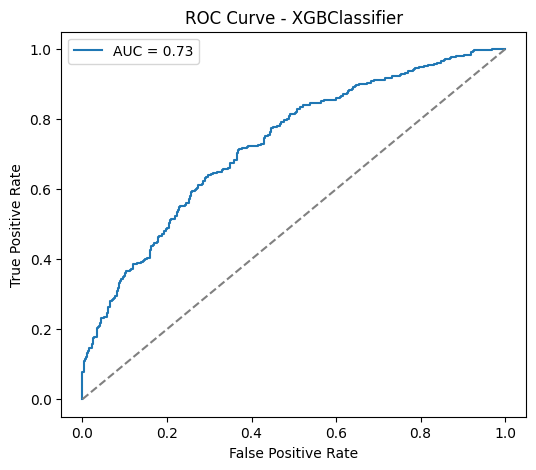

Actual vs Predicted Table (First 10 Instances):
      Actual  Predicted
2167       0          1
1063       1          0
3339       0          0
458        1          1
3536       1          1
1868       1          1
112        1          1
1300       1          1
3598       0          1
1291       1          1


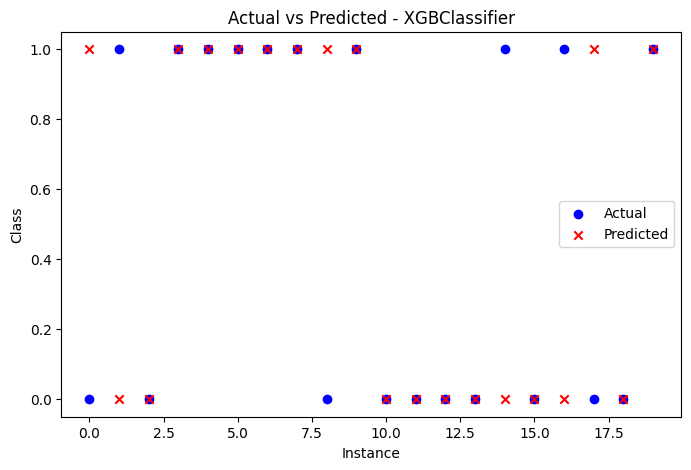


Feature Importance for XGBClassifier:
                  Feature  Importance
0                   Close    0.143295
1               Adj Close    0.114268
2                     Low    0.081995
3                    Open    0.074067
4                Tomorrow    0.068375
5                    High    0.058838
6           Returns_sp500    0.051870
7                  EMA_20    0.051693
8                  Volume    0.050973
9                  SMA_20    0.046779
10                    RSI    0.046224
11             Volatility    0.044345
12              Price_ROC    0.043745
13  Stochastic_Oscillator    0.043134
14                Returns    0.041643
15                   MACD    0.038757
16     Cumulative_Returns    0.000000
17            Williams_%R    0.000000


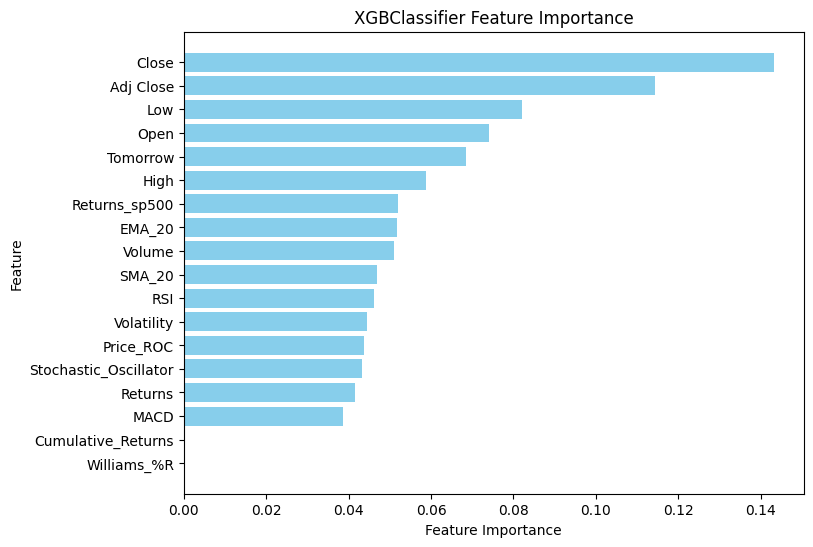

--- Evaluating LogisticRegression ---
Accuracy: 0.5233
Precision: 0.5233
Recall: 1.0000
F1 Score: 0.6871
AUC-ROC: 0.4974


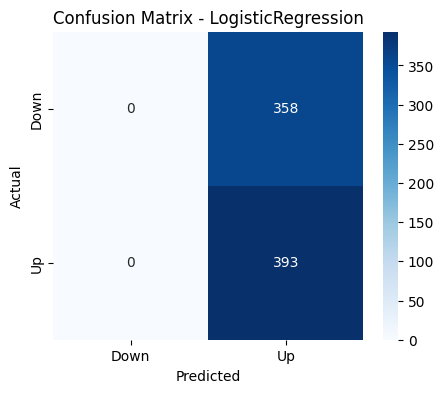

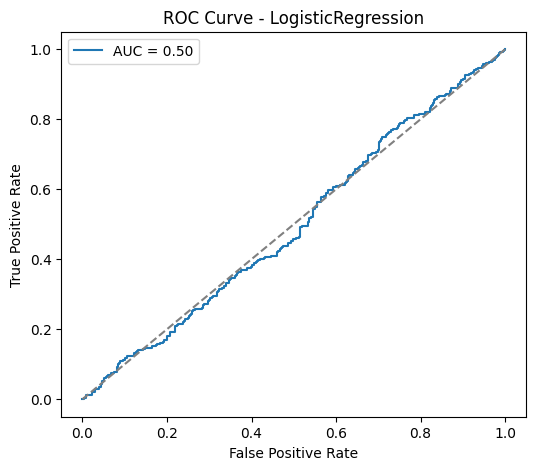

Actual vs Predicted Table (First 10 Instances):
      Actual  Predicted
2167       0          1
1063       1          1
3339       0          1
458        1          1
3536       1          1
1868       1          1
112        1          1
1300       1          1
3598       0          1
1291       1          1


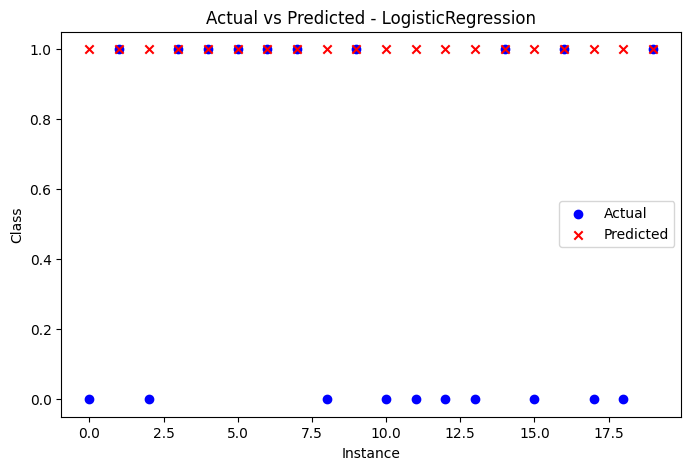

Logistic Regression Coefficients:
Feature: Adj Close, Coefficient: 0.0001
Feature: Close, Coefficient: 0.0001
Feature: High, Coefficient: 0.0001
Feature: Low, Coefficient: 0.0001
Feature: Open, Coefficient: 0.0001
Feature: Volume, Coefficient: 0.0000
Feature: Returns, Coefficient: -0.0000
Feature: Tomorrow, Coefficient: 0.0002
Feature: Volatility, Coefficient: 0.0000
Feature: Returns_sp500, Coefficient: -0.0000
Feature: Cumulative_Returns, Coefficient: 0.0003
Feature: SMA_20, Coefficient: 0.0001
Feature: EMA_20, Coefficient: 0.0001
Feature: Stochastic_Oscillator, Coefficient: 0.0002
Feature: Williams_%R, Coefficient: -0.0002
Feature: RSI, Coefficient: 0.0001
Feature: Price_ROC, Coefficient: -0.0000
Feature: MACD, Coefficient: -0.0000


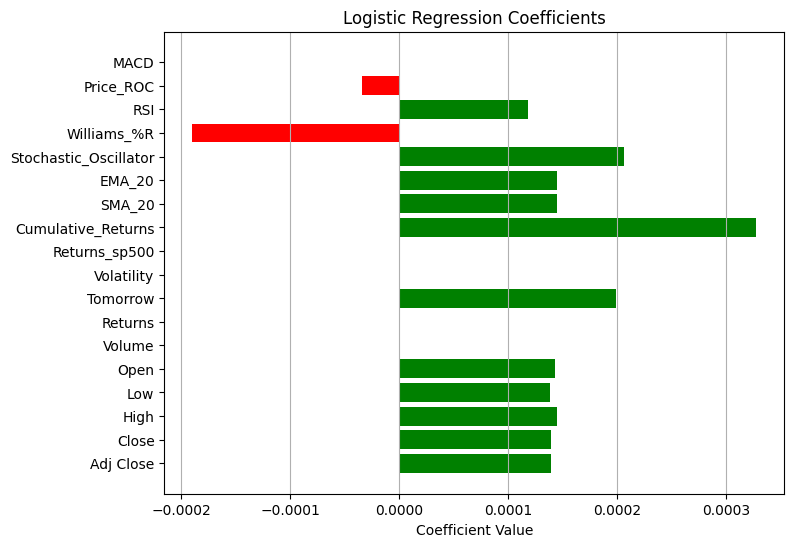

In [46]:
# Fit the models (assuming X_train, X_test, y_train, y_test are already defined)
fitted_models = {}
for name, model in models.items():
    if name in ['XGBClassifier', 'LogisticRegression']:
        model.fit(X_train, y_train)
        fitted_models[name] = model  # Store fitted models

# Evaluate each model
for name, model in fitted_models.items():
    print(f"--- Evaluating {name} ---")
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC-AUC
    
    # Compute Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    
    # 📌 Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # 📌 Plot ROC and AUC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal Line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.show()
    
    # 📌 Actual vs Predicted DataFrame & Plot
    actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print("Actual vs Predicted Table (First 10 Instances):")
    print(actual_vs_predicted.head(10))

    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(y_test[:20])), y_test[:20], color='blue', label='Actual')
    plt.scatter(range(len(y_pred[:20])), y_pred[:20], color='red', marker='x', label='Predicted')
    plt.legend()
    plt.xlabel('Instance')
    plt.ylabel('Class')
    plt.title(f'Actual vs Predicted - {name}')
    plt.show()

   
        # 📌 Feature Importance for XGBClassifier
    if name == 'XGBClassifier':
        plt.figure(figsize=(8, 6))
        
        # Extract feature importance values
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]  # Sort in descending order
        feature_names = X_train.columns
        
        # Create DataFrame for feature importance
        feature_importance_df = pd.DataFrame({
            'Feature': [feature_names[i] for i in indices],
            'Importance': importances[indices]
        })

        # Print Feature Importance DataFrame
        print("\nFeature Importance for XGBClassifier:")
        print(feature_importance_df)

        # Plot Feature Importance
        plt.barh(range(len(indices)), importances[indices], align='center', color='skyblue')
        plt.yticks(range(len(indices)), feature_importance_df['Feature'])
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.title(f'{name} Feature Importance')
        plt.gca().invert_yaxis()
        plt.show()


    # 📌 Feature Importance for Logistic Regression
    if name == 'LogisticRegression' and hasattr(model, 'coef_'):
        coefficients = model.coef_[0]  # For binary classification
        feature_names = X_train.columns

        # Print the feature names and their corresponding coefficients
        feature_coefficients = list(zip(feature_names, coefficients))
        print("Logistic Regression Coefficients:")
        for feature, coef in feature_coefficients:
            print(f"Feature: {feature}, Coefficient: {coef:.4f}")

        # Plotting
        plt.figure(figsize=(8, 6))
        plt.barh(
            feature_names,
            coefficients,
            color=['green' if coef > 0 else 'red' for coef in coefficients],
        )
        plt.xlabel('Coefficient Value')
        plt.title('Logistic Regression Coefficients')
        plt.grid(axis='x')
        plt.show()



# Model Performance Analysis
**(a) XGBoost Classifier**
1. Performance Metrics:
  * Accuracy: 66.98%
  * Precision: 66.59%
  * Recall: 74.05%
  * F1 Score: 70.12%
  * AUC-ROC: 0.73

2. Confusion Matrix:
  * Model misclassified 146 "down" instances as "up."
  * Model misclassified 102 "up" instances as "down."

3. Feature Importance:
  * Close (13.5%), Adj Close (12.4%), Low (8.0%), Tomorrow (7.3%) are the most influential features.
  * Williams_%R and Cumulative_Returns had no impact (importance = 0.0).

**Logistic Regression**
1. Performance Metrics:
  * Accuracy: 52.33%
  * Precision: 52.33%
  * Recall: 100.00% (classified all instances as "up")
  * F1 Score: 68.71%
  * AUC-ROC: 0.50 (random guessing)

2. Confusion Matrix:
  * Model predicted all samples as "up" (393 true positives, 358 false positives).

3. Feature Importance:
  * Coefficients are very small (~0.0001), indicating poor feature differentiation.

**Key Insight:**
1. XGBoost shows strong predictive power (AUC-ROC: 0.73), meaning it effectively differentiates between stock price movements. The model slightly favors recall over precision, meaning it captures more "up" movements but misclassifies some "down" instances.

2. Logistic Regression is ineffective (AUC-ROC 0.50, meaning random performance). The model always predicts "up", ignoring "down" cases. This suggests:

  * Linear relationships may not capture stock movements well.
  * Feature scaling or selection may need revision.
  * A more complex model (like XGBoost) is required.

**Model Performance:**

**XGBoost is the best-performing model (AUC-ROC = 0.73, Accuracy = 66.98%), effectively predicting price movements.**

**Logistic Regression fails (AUC-ROC = 0.50, Accuracy = 52.33%), suggesting stock prices are not linearly separable.**

# 6.0 Fundamental Analysis

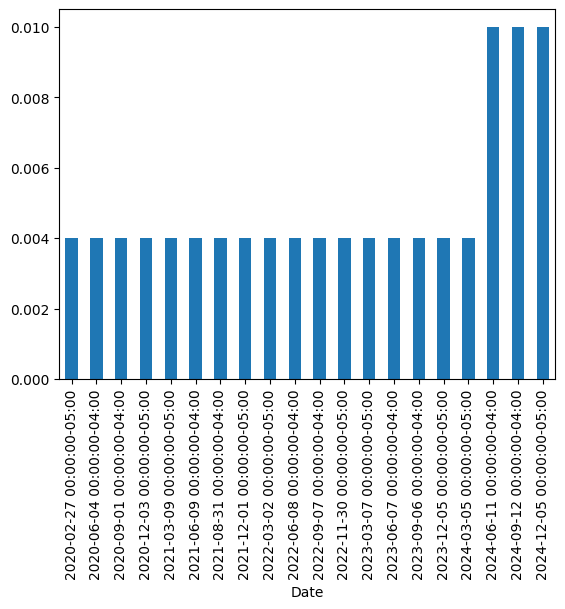

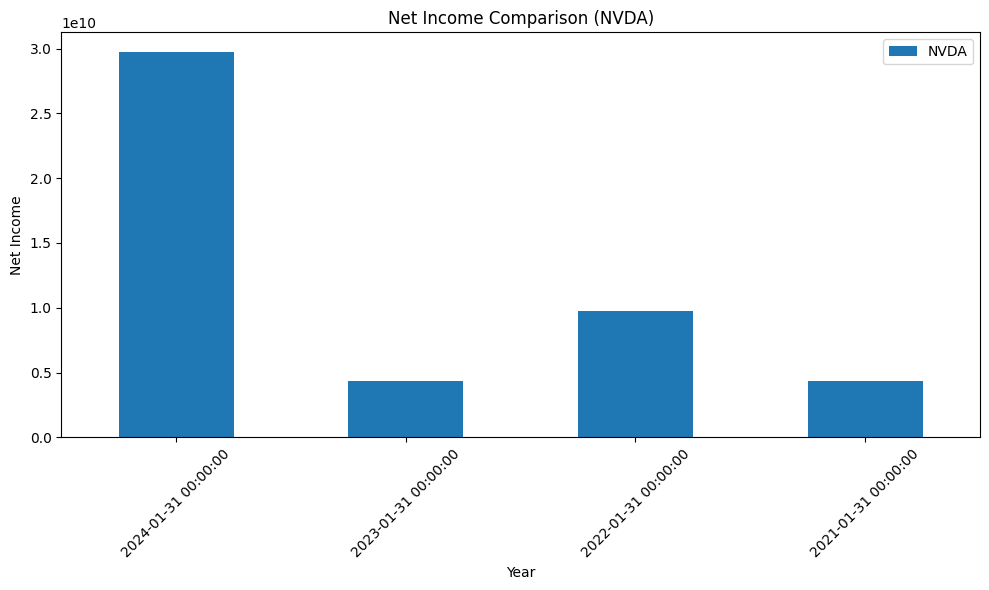

In [47]:
# Fetch NVIDIA's financial data
ticker = "NVDA"
nvda = yf.Ticker(ticker)

stack = yf.Ticker("NVDA")
stack.dividends.tail(20).plot(kind='bar')

nvda_pl = stack.financials.T
# Assuming nvda_fin and qubt_fin are already defined as in your provided code
# ... (your existing code to define nvda_fin and qubt_fin)

# Extract Net Income data
nvda_net_income = nvda_pl['Net Income']
#qubt_net_income = qubt_pl['Net Income'] #This will currently be the same as nvda_fin since you assign the same dataframe to qubt_fin.  You need to download the data for QUBT.

# Create a DataFrame for plotting
net_income_df = pd.DataFrame({
    'NVDA': nvda_net_income,
   # 'QUBT': qubt_net_income
})


# Plot the bar chart
net_income_df.plot(kind='bar', figsize=(10, 6))
plt.title('Net Income Comparison (NVDA)')
plt.xlabel('Year')
plt.ylabel('Net Income')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
# Fetch NVDA stock data
ticker = "NVDA"
nvda = yf.Ticker(ticker)

# Get Market Cap data
market_cap_df = nvda.history(period="5y")
market_cap_df["Market Cap"] = market_cap_df["Close"] * nvda.info["sharesOutstanding"]

# Load financials from the Excel file
# Load financials from the Excel file in the current working directory
nvda_pl = pd.read_excel("historical_financials.xlsx", sheet_name="NVDA_Income", index_col=0)
nvda_bal = pd.read_excel("historical_financials.xlsx", sheet_name="NVDA_Balance", index_col=0)
nvda_cf = pd.read_excel("historical_financials.xlsx", sheet_name="NVDA_CashFlow", index_col=0)


# Parse years
nvda_pl.index = pd.to_datetime(nvda_pl.index, errors='coerce').year
nvda_bal.index = pd.to_datetime(nvda_bal.index, errors='coerce').year
nvda_cf.index = pd.to_datetime(nvda_cf.index, errors='coerce').year

# Incorporate Market Cap data for each year (use average Market Cap of the year)
market_cap_avg = market_cap_df.resample("Y").mean()["Market Cap"]
market_cap_avg.index = market_cap_avg.index.year  # Convert index to year
nvda_bal["Market Cap"] = market_cap_avg.reindex(nvda_bal.index)

# Fundamental Analysis
fundamental_analysis = pd.DataFrame(index=nvda_pl.index)

# 1. Profitability Metrics
fundamental_analysis["Gross Profit Margin (%)"] = (nvda_pl["Gross Profit"] / nvda_pl["Operating Revenue"]) * 100
fundamental_analysis["Operating Margin (%)"] = (nvda_pl["Operating Income"] / nvda_pl["Operating Revenue"]) * 100
fundamental_analysis["Net Profit Margin (%)"] = (nvda_pl["Net Income"] / nvda_pl["Operating Revenue"]) * 100

# 2. Financial Stability Metrics
fundamental_analysis["Debt-to-Equity Ratio"] = nvda_bal["Total Liabilities Net Minority Interest"] / nvda_bal["Stockholders Equity"]
fundamental_analysis["Current Ratio"] = nvda_bal["Current Assets"] / nvda_bal["Current Liabilities"]

# 3. Growth Metrics
fundamental_analysis["Revenue Growth Rate (%)"] = nvda_pl["Operating Revenue"].pct_change() * 100
fundamental_analysis["Earnings Growth Rate (%)"] = nvda_pl["Net Income"].pct_change() * 100

# 4. Cash Flow Metrics
fundamental_analysis["Free Cash Flow"] = nvda_cf["Free Cash Flow"] - nvda_cf["Capital Expenditure"]
fundamental_analysis["Operating Cash Flow"] = nvda_cf["Free Cash Flow"]

# 5. Valuation Metrics
fundamental_analysis["P/E Ratio"] = nvda_bal["Market Cap"] / nvda_pl["Net Income"]
fundamental_analysis["P/B Ratio"] = nvda_bal["Market Cap"] / nvda_bal["Stockholders Equity"]

# 6. Efficiency Metrics
fundamental_analysis["ROE (%)"] = (nvda_pl["Net Income"] / nvda_bal["Stockholders Equity"]) * 100
fundamental_analysis["ROA (%)"] = (nvda_pl["Net Income"] / nvda_bal["Total Assets"]) * 100

# 7. Market and Dividend Metrics
fundamental_analysis["Market Cap"] = nvda_bal["Market Cap"]

# Display the DataFrame
print("Fundamental Analysis Results:")
fundamental_analysis




Fundamental Analysis Results:


C:\Users\Kenny Ogundana\AppData\Local\Temp\ipykernel_14480\436113733.py:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  market_cap_avg = market_cap_df.resample("Y").mean()["Market Cap"]


,Gross Profit Margin (%),Operating Margin (%),Net Profit Margin (%),Debt-to-Equity Ratio,Current Ratio,Revenue Growth Rate (%),Earnings Growth Rate (%),Free Cash Flow,Operating Cash Flow,P/E Ratio,P/B Ratio,ROE (%),ROA (%),Market Cap
2024,72.717573,54.121664,48.849348,0.529341,4.171292,NaN,NaN,2.809000e+10,2.702100e+10,88.718235,61.432702,69.244730,45.277507,2.640255e+12
2023,56.928894,20.675465,16.193371,0.863355,3.515618,-55.723712,-85.322581,5.641000e+09,3.808000e+09,204.938343,40.503628,19.763812,10.606576,8.951707e+11
2022,64.929033,37.307721,36.233930,0.660416,6.650288,-0.222436,123.260073,9.108000e+09,8.132000e+09,46.569637,17.065501,36.645123,22.069840,4.541471e+11
2021,62.344828,27.178411,25.979010,0.704315,4.090446,-38.043397,-55.578343,5.822000e+09,4.694000e+09,110.145270,28.245386,25.643758,15.046369,4.771493e+11


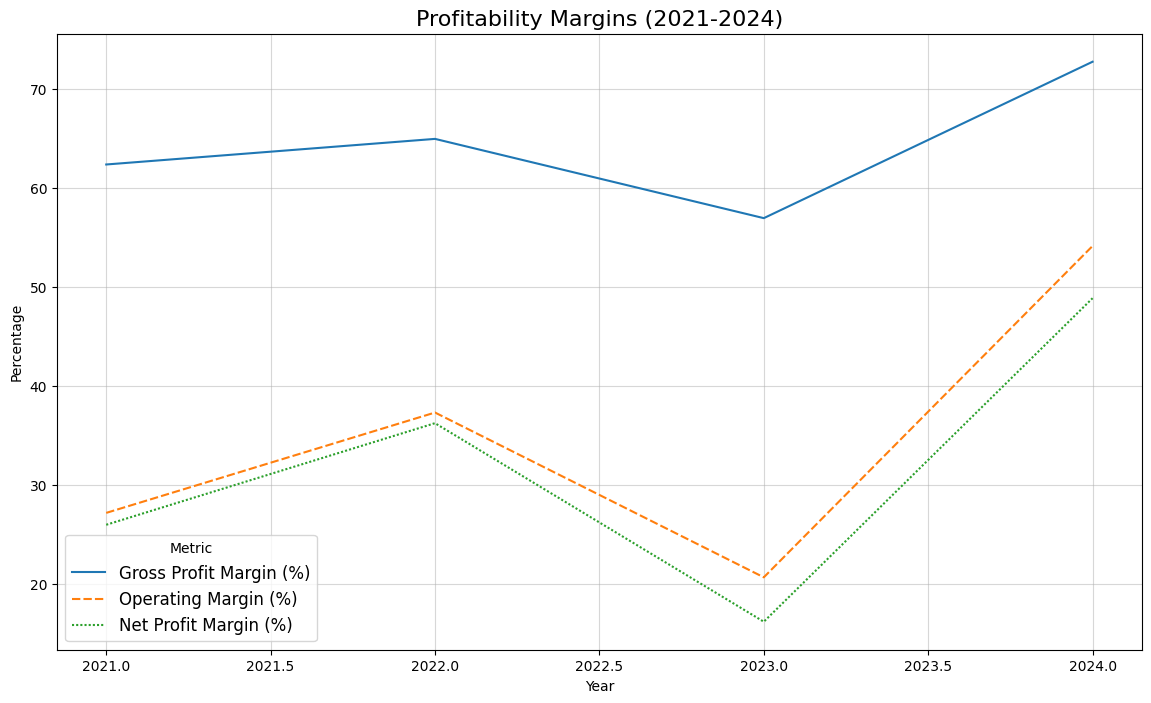

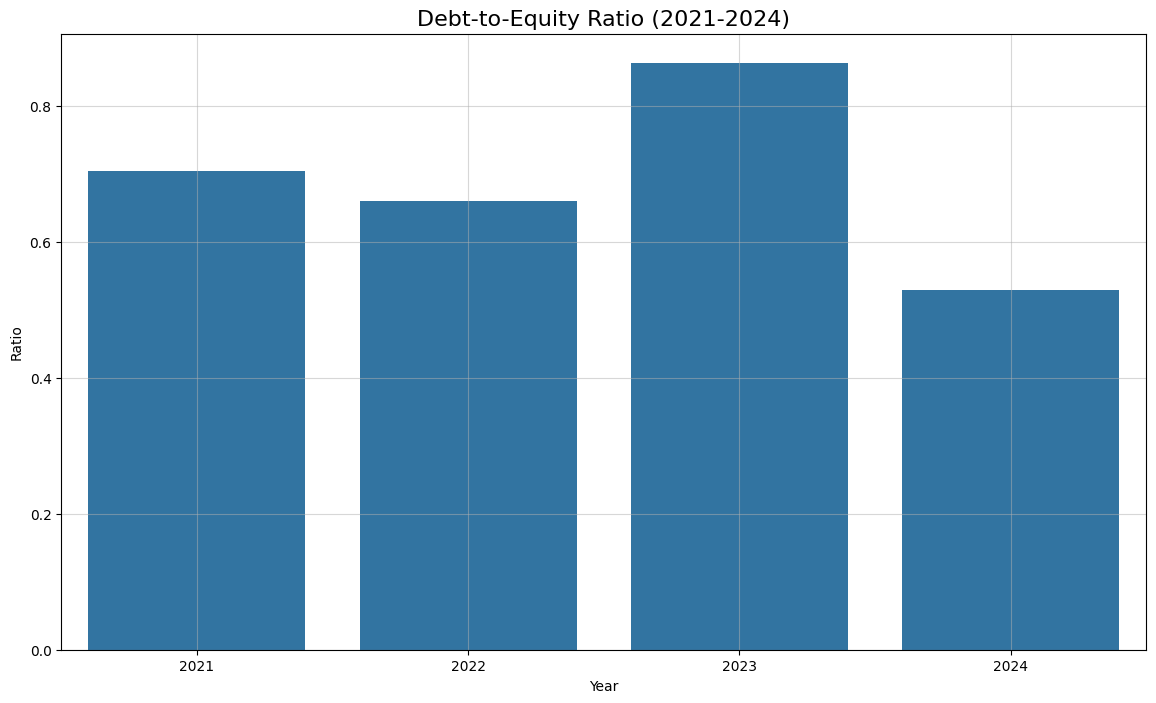

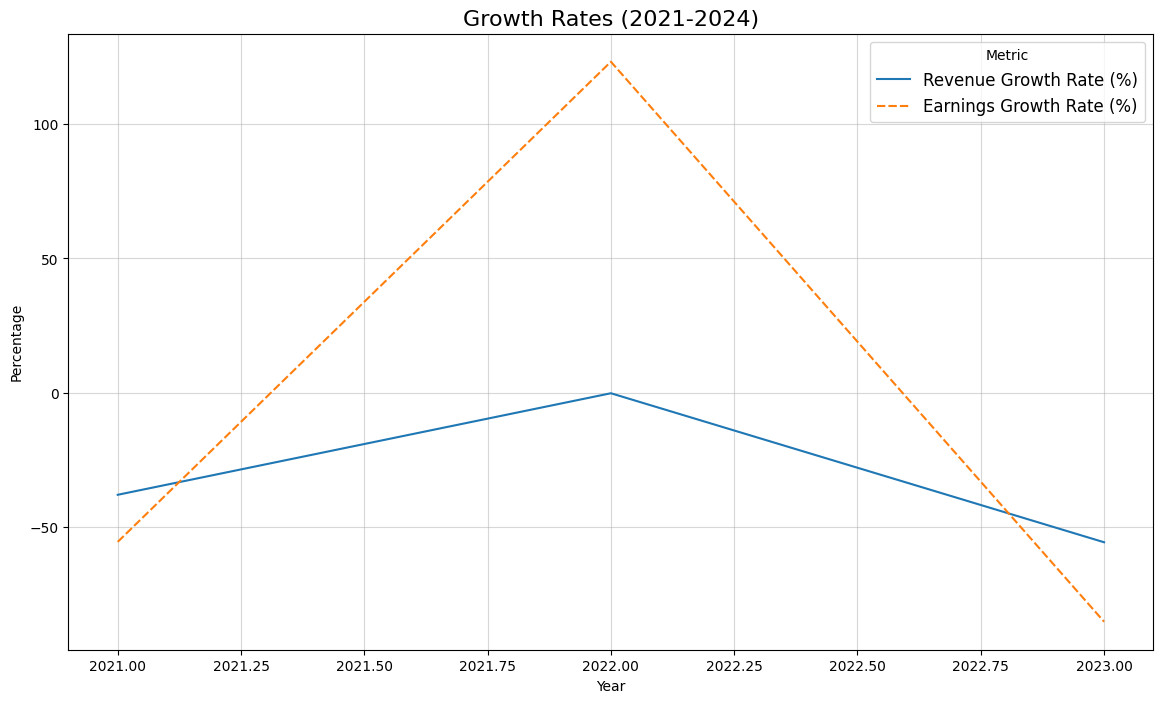

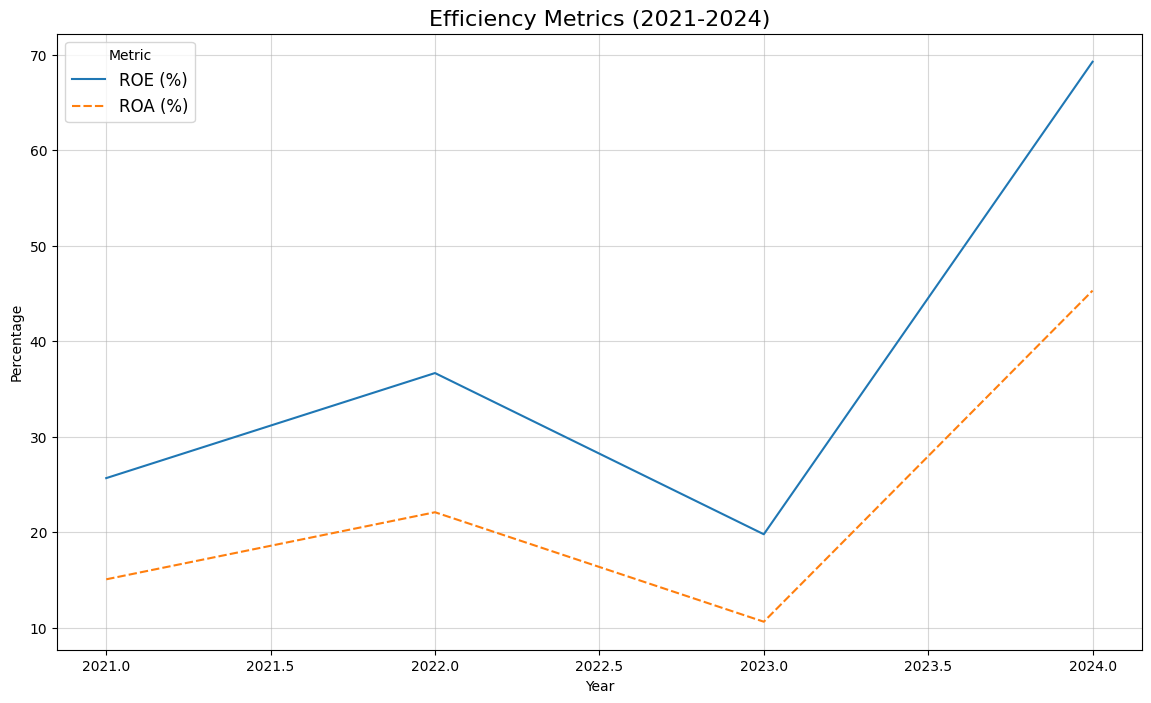

In [49]:
# Visualize Key Metrics
plt.figure(figsize=(14, 8))
sns.lineplot(data=fundamental_analysis[["Gross Profit Margin (%)", "Operating Margin (%)", "Net Profit Margin (%)"]])
plt.title("Profitability Margins (2021-2024)", fontsize=16)
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend(title="Metric", fontsize=12)
plt.grid(visible=True, alpha=0.5)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=fundamental_analysis.index, y=fundamental_analysis["Debt-to-Equity Ratio"])
plt.title("Debt-to-Equity Ratio (2021-2024)", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Year")
plt.grid(visible=True, alpha=0.5)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=fundamental_analysis[["Revenue Growth Rate (%)", "Earnings Growth Rate (%)"]])
plt.title("Growth Rates (2021-2024)", fontsize=16)
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend(title="Metric", fontsize=12)
plt.grid(visible=True, alpha=0.5)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=fundamental_analysis[["ROE (%)", "ROA (%)"]])
plt.title("Efficiency Metrics (2021-2024)", fontsize=16)
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend(title="Metric", fontsize=12)
plt.grid(visible=True, alpha=0.5)
plt.show()
